In [134]:
import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import glob # to read all the files at once
import os # Get the current working directory
import dill # For saving and loading Python objects
import matplotlib.pyplot as plt # For plotting
import seaborn as sns
import scipy.stats as stats # For statistical tests
# from sklearn.linear_model import LinearRegression # For linear regression
import statsmodels.formula.api as smf # For statistical models
from scipy.optimize import minimize # For optimization

In [135]:
# Load and automatically restore all variables to global namespace
with open("Exp2_analysis.pkl", "rb") as f:
    loaded_vars = dill.load(f)
    globals().update(loaded_vars)

print(f"Loaded {len(loaded_vars)} variables:", list(loaded_vars.keys()))

Loaded 15 variables: ['credited_IDs', 'sh_corrs_hits', 'sh_corrs_hits_random', 'sh_corrs_fa', 'sh_corrs_fa_random', 'df_by_item', 'df_by_item_wide', 'dist_mat_gr1', 'dist_mat_gr2', 'distinctiveness_image_id', 'individ_hs_optim_gr1', 'individ_hs_optim_gr2', 'df_by_item_individ', 'filtered_data_test', 'filtered_data_memory']


# Load Data

In [136]:
# Read Data

# Path to your Data folder
data_folder = 'Data'

# Get all JSON files in the folder
files = glob.glob(os.path.join(data_folder, '*.json'))
# Keep only files whose filename (without path) splits into 3 parts on "_"
#files = [f for f in files if len(os.path.basename(f).split('_')) == 3]

# Read and concatenate all files
data_frames = [pd.read_json(file) for file in files]
data_set = pd.concat(data_frames, ignore_index=True)
data_set

,width,height,webaudio,browser,browser_version,mobile,os,fullscreen,vsync_rate,webcam,...,broad_category,image_png,image_id,category_name,category,distinct_rating,distinct_type,correct_response,item_type,cor_ans
0,1366.0,633.0,1.0,chrome,141.0.0,0.0,Windows 10,1.0,30.16,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,I,I_Diorite_04.png,36.0,Diorite,3.0,2.98,Bottom,l,Target,1.0
13198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,I,I_Gabbro_02.png,50.0,Gabbro,4.0,2.73,Bottom,a,Foil,1.0


# Filter Data

In [137]:
# Memory phase data
filtered_data_memory = data_set.loc[
    data_set['task'] == 'memory_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'category_name','category','broad_category',
     'image_png','image_id','distinct_rating','distinct_type']
    ].copy()
filtered_data_memory = filtered_data_memory.astype({
    "subject_id": "category", "broad_category": "category",
    "image_id": "int", "category_name": "category",
    "category": "int"
    })
filtered_data_memory.head(10)

,trial_index,subject_id,group,task,item_type,category_name,category,broad_category,image_png,image_id,distinct_rating,distinct_type
6,6,90163,Group2,memory_phase,NaN,Pumice,9,I,I_Pumice_01.png,129,3.25,Bottom
8,8,90163,Group2,memory_phase,NaN,Obsidian,6,I,I_Obsidian_06.png,86,8.01,Top
10,10,90163,Group2,memory_phase,NaN,Rhyolite,10,I,I_Rhyolite_10.png,154,2.88,Bottom
12,12,90163,Group2,memory_phase,NaN,Gneiss,13,M,M_Gneiss_15.png,207,3.11,Bottom
14,14,90163,Group2,memory_phase,NaN,Dolomite,25,S,S_Dolomite_16.png,400,1.71,Bottom
16,16,90163,Group2,memory_phase,NaN,Rock Salt,28,S,S_Rock Salt_13.png,445,7.58,Top
18,18,90163,Group2,memory_phase,NaN,Diorite,3,I,I_Diorite_10.png,42,2.84,Bottom
20,20,90163,Group2,memory_phase,NaN,Marble,15,M,M_Marble_14.png,238,3.31,Bottom
22,22,90163,Group2,memory_phase,NaN,Gabbro,4,I,I_Gabbro_12.png,60,2.60,Bottom
24,24,90163,Group2,memory_phase,NaN,Shale,30,S,S_Shale_03.png,467,1.95,Bottom


In [138]:
# Test phase data
filtered_data_test = data_set.loc[
    data_set['task'] == 'test_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'response','correct_response', 'cor_ans','rt', 
     'category_name', 'category','broad_category',
     'image_png', 'image_id', 'distinct_rating','distinct_type']
    ].copy()
filtered_data_test = filtered_data_test.astype({
    "subject_id": "category",
    "group": "category",
    'item_type': "category",
    "broad_category": "category",
    "image_id": "int",
    "category_name": "category",
    "category": "int",
    "cor_ans": "bool"
    })

filtered_data_test.head(10)

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating,distinct_type
107,107,90163,Group2,test_phase,Target,l,l,True,1986.0,Gneiss,13,M,M_Gneiss_14.png,206,3.41,Bottom
109,109,90163,Group2,test_phase,Foil,a,a,True,1453.0,Gneiss,13,M,M_Gneiss_06.png,198,2.65,Bottom
111,111,90163,Group2,test_phase,Target,l,l,True,1956.0,Marble,15,M,M_Marble_14.png,238,3.31,Bottom
113,113,90163,Group2,test_phase,Target,l,l,True,1035.0,Phyllite,17,M,M_Phyllite_13.png,269,2.80,Bottom
115,115,90163,Group2,test_phase,Target,l,l,True,1156.0,Gneiss,13,M,M_Gneiss_10.png,202,3.09,Bottom
117,117,90163,Group2,test_phase,Target,l,l,True,1014.0,Peridotite,8,I,I_Peridotite_13.png,125,7.28,Top
119,119,90163,Group2,test_phase,Foil,l,a,False,1260.0,Diorite,3,I,I_Diorite_03.png,35,3.14,Bottom
121,121,90163,Group2,test_phase,Foil,a,a,True,2096.0,Slate,20,M,M_Slate_11.png,315,2.75,Bottom
123,123,90163,Group2,test_phase,Target,l,l,True,919.0,Slate,20,M,M_Slate_04.png,308,2.20,Bottom
125,125,90163,Group2,test_phase,Target,l,l,True,1620.0,Conglomerate,24,S,S_Conglomerate_14.png,382,6.86,Top


# Grant credit for participation

In [139]:
percent_cor_IDs = (filtered_data_test
 .groupby(['subject_id','group'], observed=True)['cor_ans']
 .mean() # mean per subject
 .reset_index()
 )
percent_cor_IDs['cor_ans'].describe()  # descriptive statistics across subjects

count    43.000000
mean      0.576512
std       0.081821
min       0.400000
25%       0.515000
50%       0.590000
75%       0.620000
max       0.760000
Name: cor_ans, dtype: float64

In [140]:
# t-test compare with chance level (0.5)
stats.ttest_1samp(percent_cor_IDs['cor_ans'], popmean=0.5)

TtestResult(statistic=6.131921923678612, pvalue=2.5654975019835235e-07, df=42)

In [141]:
# by group
(percent_cor_IDs
 .groupby('group', observed=True)['cor_ans']
 .agg(['mean','std','count','sem'])
 )

,mean,std,count,sem
group,,,,
Group1,0.598571,0.076895,21,0.01678
Group2,0.555455,0.082504,22,0.01759


In [142]:
# compare two groups
stats.ttest_ind(percent_cor_IDs.loc[percent_cor_IDs['group'] == 'Group1', 'cor_ans'],
                percent_cor_IDs.loc[percent_cor_IDs['group'] == 'Group2', 'cor_ans'])

TtestResult(statistic=1.7706686628687727, pvalue=0.08405062664592933, df=41.0)

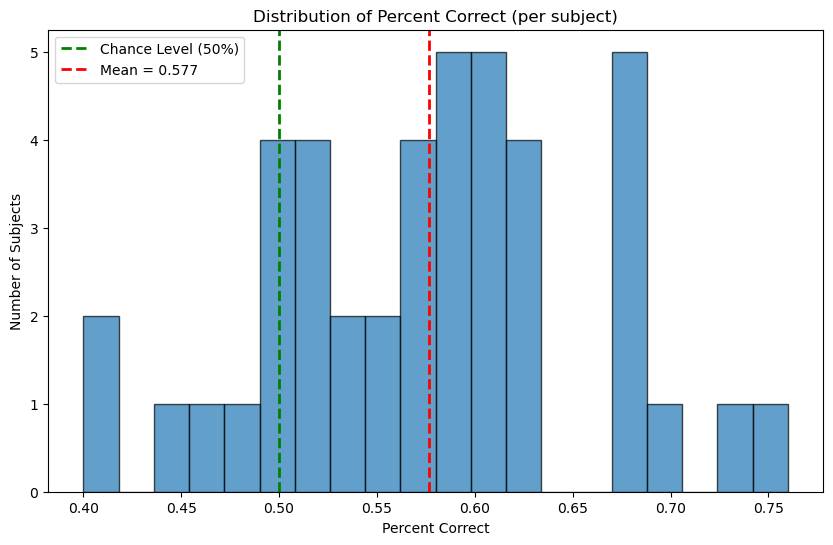

In [143]:
# unified plot
plt.figure(figsize=(10, 6))
plt.hist(percent_cor_IDs['cor_ans'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(0.5, color='green', linestyle='dashed', linewidth=2, label='Chance Level (50%)')
plt.axvline(percent_cor_IDs['cor_ans'].mean(), color='red', 
            linestyle='dashed', linewidth=2, label=f'Mean = {percent_cor_IDs["cor_ans"].mean():.3f}')
plt.xlabel("Percent Correct")
plt.ylabel("Number of Subjects")
plt.title("Distribution of Percent Correct (per subject)")
plt.legend()
plt.show()

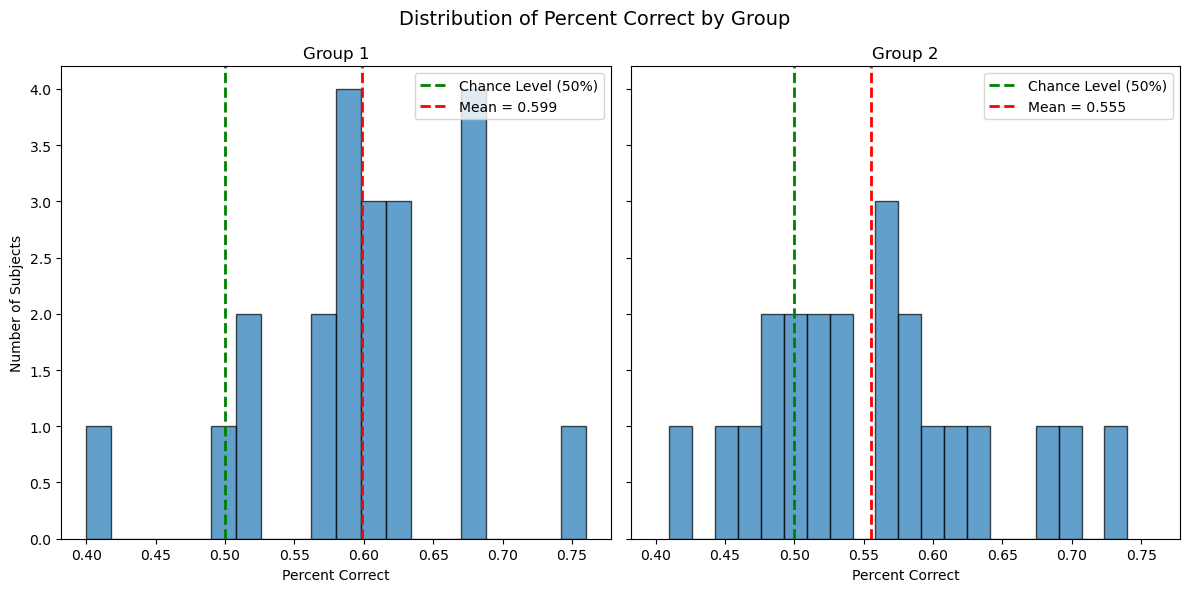

In [144]:
# by groups
groups = np.sort(percent_cor_IDs["group"].unique())
fig, axes = plt.subplots(1, len(groups), # rows, cols
                         figsize=(12, 6), 
                         sharey=True,sharex=True # share x and y axis scales
                         )

for ax, g in zip(axes, groups):
    data = percent_cor_IDs.loc[percent_cor_IDs["group"] == g, "cor_ans"]
    ax.hist(data, bins=20, edgecolor="black", alpha=0.7)
    
    # Chance level
    ax.axvline(.50, color="green", linestyle="dashed", linewidth=2, label="Chance Level (50%)")
    # Group mean
    ax.axvline(data.mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean = {data.mean():.3f}")
    
    ax.set_title(f"Group {g[-1]}") # g = 'Group1' or 'Group2', so g[-1] is '1' or '2'
    ax.set_xlabel("Percent Correct")
    ax.legend()

axes[0].set_ylabel("Number of Subjects")
fig.suptitle("Distribution of Percent Correct by Group", fontsize=14)
plt.tight_layout()
plt.show()

In [145]:
# Get unique subject IDs from data
all_IDs = filtered_data_test['subject_id'].unique()

# Compute difference
not_credited_yet = [id for id in all_IDs if id not in credited_IDs]

print(not_credited_yet)

[]


88970, 89344

In [146]:
len(not_credited_yet) # Number of subjects not credited yet

0

In [147]:
credited_IDs = filtered_data_test['subject_id'].unique()

In [148]:
credited_IDs

[90163, 90293, 90221, 89118, 88926, ..., 90235, 88788, 86883, 86329, 88914]
Length: 43
Categories (43, int64): [86329, 86400, 86706, 86725, ..., 90221, 90235, 90261, 90293]

87768

In [149]:
# IDs who completed the experiment more than once
ID_trial_count = filtered_data_test['subject_id'].value_counts()
(ID_trial_count
 .index[ np.where( ID_trial_count.values > 100 ) ] # IDs with more than 100 trials
 .tolist() # more readable format
 )

[]

# d' by ID

Calculate d' with adjustments (for both hits and false alarms Macmillan & Kaplan, 1985), so that if there is a perfect (1) or terrible (0) hit, or fa, we still got a value (not infinity):
$$\text{Hit} = \frac{N_{hits} + 0.5}{N_{signal\_trials} + 1}$$

Same for FAs.

In [150]:
# Compute hits and number of signal trials per subject
hits_IDs = (
    filtered_data_test
    .loc[filtered_data_test['item_type'] == 'Target']
    .groupby('subject_id', observed=True)
    .agg(
        hits=('cor_ans', 'sum'),
        signal_trials=('cor_ans', 'count')
    )
    .reset_index()
)

# Compute unadjusted hit rate
hits_IDs['Hit_rate'] = hits_IDs['hits'] / hits_IDs['signal_trials']

# Apply Macmillan & Kaplan (1985) correction
hits_IDs['Hit_rate_adj'] = (hits_IDs['hits'] + 0.5) / (hits_IDs['signal_trials'] + 1)
hits_IDs

,subject_id,hits,signal_trials,Hit_rate,Hit_rate_adj
0,86329,32,50,0.64,0.637255
1,86400,39,50,0.78,0.774510
2,86706,38,50,0.76,0.754902
3,86725,34,50,0.68,0.676471
4,86880,36,50,0.72,0.715686
5,86883,28,50,0.56,0.558824
6,86923,36,50,0.72,0.715686
7,86965,41,50,0.82,0.813725
8,87016,33,50,0.66,0.656863
9,87490,37,50,0.74,0.735294


In [151]:
# Compute false alarms and number of noise trials per subject
FA_IDs = (
    filtered_data_test
    .loc[filtered_data_test['item_type'] == 'Foil']
    .groupby('subject_id', observed=True)
    .agg(
        # Count "l" responses as false alarms
        FA=('response', lambda x: (x == 'l').sum()),
        noise_trials=('response', 'count')
    )
    .reset_index()
)

# Compute unadjusted false alarm rate
FA_IDs['FA_rate'] = FA_IDs['FA'] / FA_IDs['noise_trials']

# Apply Macmillan & Kaplan (1985) correction
FA_IDs['FA_rate_adj'] = (FA_IDs['FA'] + 0.5) / (FA_IDs['noise_trials'] + 1)

FA_IDs

,subject_id,FA,noise_trials,FA_rate,FA_rate_adj
0,86329,31,50,0.62,0.617647
1,86400,30,50,0.60,0.598039
2,86706,20,50,0.40,0.401961
3,86725,32,50,0.64,0.637255
4,86880,10,50,0.20,0.205882
5,86883,33,50,0.66,0.656863
6,86923,28,50,0.56,0.558824
7,86965,32,50,0.64,0.637255
8,87016,35,50,0.70,0.696078
9,87490,19,50,0.38,0.382353


In [152]:
# Calculate d'
dprime_ID = pd.merge(hits_IDs, FA_IDs, on='subject_id')
dprime_ID['dprimes'] = [stats.norm.ppf(hit) - stats.norm.ppf( (fa) ) 
  for hit, fa 
  in zip(dprime_ID['Hit_rate_adj'], dprime_ID['FA_rate_adj'])
  ]

# Drop columns
dprime_ID = (dprime_ID
 .drop( columns={'hits', 'signal_trials', 'Hit_rate', 'FA', 'noise_trials', 'FA_rate'})
 .rename(columns = {'Hit_rate_adj':'Hit_rate',
                    'FA_rate_adj':'FA_rate'})
 )

dprime_ID

,subject_id,Hit_rate,FA_rate,dprimes
0,86329,0.637255,0.617647,0.051824
1,86400,0.774510,0.598039,0.505506
2,86706,0.754902,0.401961,0.938272
3,86725,0.676471,0.637255,0.106721
4,86880,0.715686,0.205882,1.390866
5,86883,0.558824,0.656863,-0.255929
6,86923,0.715686,0.558824,0.422087
7,86965,0.813725,0.637255,0.540578
8,87016,0.656863,0.696078,-0.109239
9,87490,0.735294,0.382353,0.928211


In [153]:
# add groups from percent_cor_IDs
dprime_ID = pd.merge(
    dprime_ID, 
    percent_cor_IDs[['subject_id','group']], 
    on='subject_id'
    )
dprime_ID

,subject_id,Hit_rate,FA_rate,dprimes,group
0,86329,0.637255,0.617647,0.051824,Group2
1,86400,0.774510,0.598039,0.505506,Group1
2,86706,0.754902,0.401961,0.938272,Group1
3,86725,0.676471,0.637255,0.106721,Group1
4,86880,0.715686,0.205882,1.390866,Group1
5,86883,0.558824,0.656863,-0.255929,Group2
6,86923,0.715686,0.558824,0.422087,Group1
7,86965,0.813725,0.637255,0.540578,Group2
8,87016,0.656863,0.696078,-0.109239,Group2
9,87490,0.735294,0.382353,0.928211,Group1


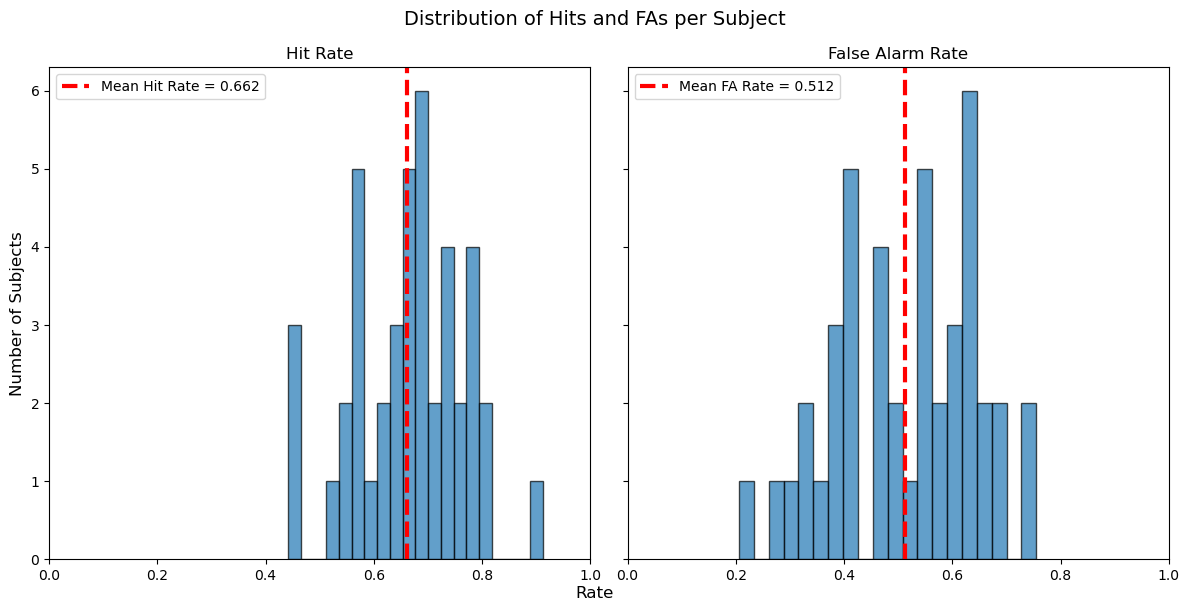

In [154]:
fig, axes = plt.subplots(1, 2, # rows, cols
                         figsize=(12, 6), 
                         sharey=True,sharex=True # share x and y axis scales
                         )


axes[0].hist(dprime_ID['Hit_rate'], bins=20, edgecolor="black", alpha=0.7)
axes[1].hist(dprime_ID['FA_rate'], bins=20, edgecolor="black", alpha=0.7)

axes[0].set_xlim(0, 1)

# Mean
axes[0].axvline(dprime_ID['Hit_rate'].mean(), color="red", 
                linestyle="dashed", linewidth=3, 
                label=f"Mean Hit Rate = {dprime_ID['Hit_rate'].mean():.3f}")
axes[1].axvline(dprime_ID['FA_rate'].mean(), color="red", 
                linestyle="dashed", linewidth=3, 
                label=f"Mean FA Rate = {dprime_ID['FA_rate'].mean():.3f}")

axes[0].set_title("Hit Rate")
axes[1].set_title("False Alarm Rate") 

fig.text(0.5, 0, "Rate", ha="center", fontsize=12)

axes[0].legend()
axes[1].legend()

axes[0].set_ylabel("Number of Subjects", fontsize=12)
fig.suptitle("Distribution of Hits and FAs per Subject", fontsize=14)
plt.tight_layout()
plt.show()

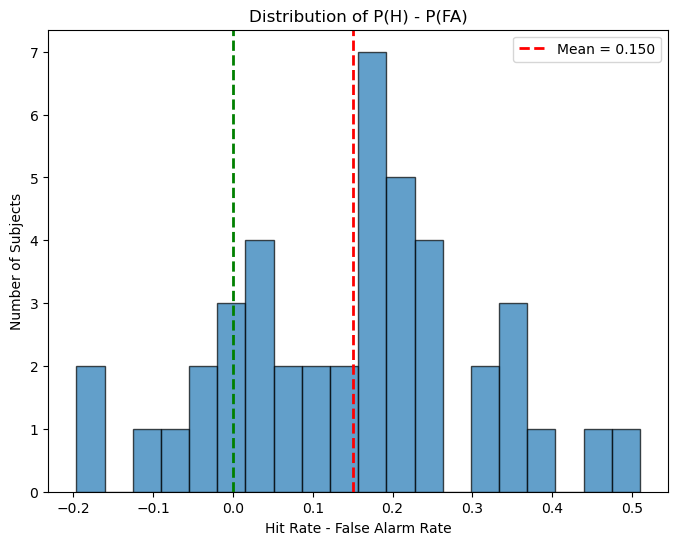

In [155]:
# p(H) - p(FA) plot
plt.figure(figsize=(8, 6))
plt.hist(dprime_ID['Hit_rate'] - dprime_ID['FA_rate'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(0, color='green', linestyle='dashed', linewidth=2)
plt.axvline((dprime_ID['Hit_rate'] - dprime_ID['FA_rate']).mean(), 
            color='red', linestyle='dashed', linewidth=2,
            label=f'Mean = {(dprime_ID["Hit_rate"] - dprime_ID["FA_rate"]).mean():.3f}')
plt.xlabel("Hit Rate - False Alarm Rate")
plt.ylabel("Number of Subjects")
plt.title("Distribution of P(H) - P(FA)")
plt.legend()
plt.show()

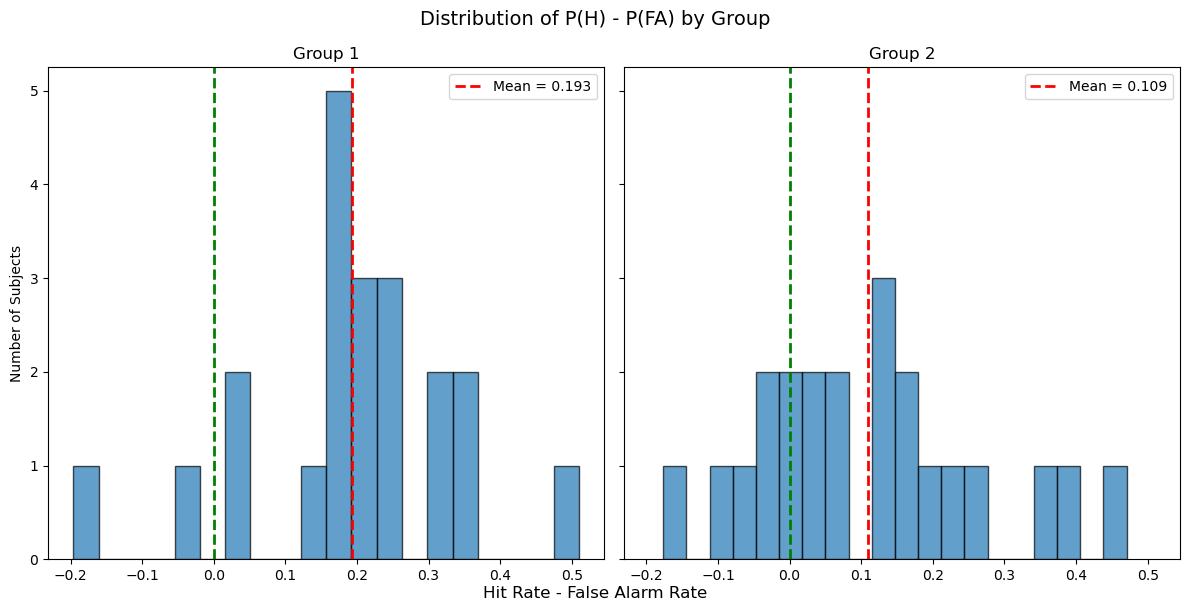

In [156]:
# p(H) - p(FA) plot by group
groups = np.sort(dprime_ID['group'].unique())

fig, axes = plt.subplots(1, len(groups), # rows, cols
                         figsize=(12, 6),
                         sharex=True, sharey=True # share x and y axis scales
                         )
for ax, g in zip(axes, groups):
    data = dprime_ID.loc[dprime_ID['group'] == g, 'Hit_rate'] - dprime_ID.loc[dprime_ID['group'] == g, 'FA_rate']
    ax.hist(data, bins=20, edgecolor="black", alpha=0.7)
    
    # Chance level
    ax.axvline(0, color='green', linestyle='dashed', linewidth=2)
    # Group mean
    ax.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2,
               label=f'Mean = {data.mean():.3f}')
    
    ax.set_title(f"Group {g[-1]}") # g = 'Group1' or 'Group2', so g[-1] is '1' or '2'
    #ax.set_xlabel("Hit Rate - False Alarm Rate")
    ax.legend()

fig.text(0.5, 0, "Hit Rate - False Alarm Rate", ha="center", fontsize=12)
axes[0].set_ylabel("Number of Subjects")
fig.suptitle("Distribution of P(H) - P(FA) by Group", fontsize=14)
plt.tight_layout()
plt.show()

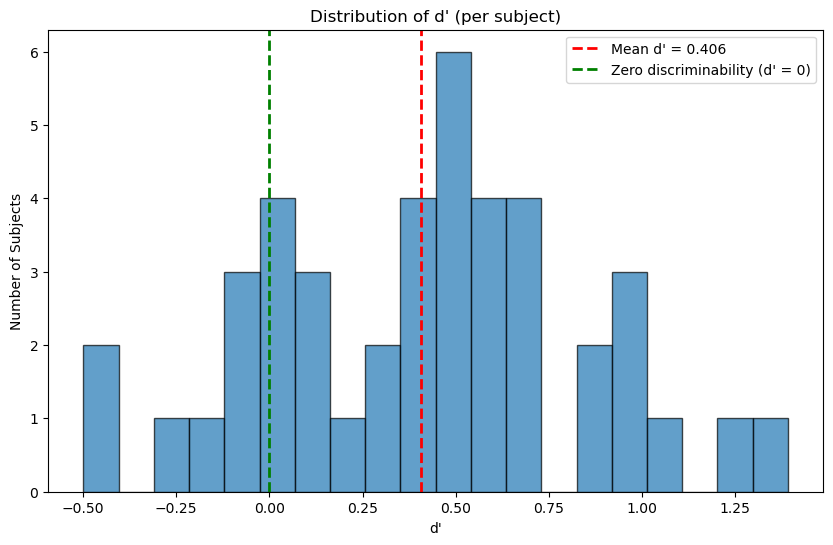

In [157]:
# d'
plt.figure(figsize=(10, 6))
plt.hist(dprime_ID['dprimes'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(np.mean(dprime_ID['dprimes']), color='red', linestyle='dashed', linewidth=2, label=f'Mean d\' = {np.mean(dprime_ID["dprimes"]):.3f}')
plt.axvline(0, color='green', linestyle='dashed', linewidth=2, label="Zero discriminability (d' = 0)")
plt.xlabel("d'")
plt.ylabel("Number of Subjects")
plt.title("Distribution of d' (per subject)")
plt.legend()
plt.show()

# d' by item

In [158]:
df_by_item = (filtered_data_test
            .groupby(['image_id','group'], observed=True)
            .agg(n_subj=('cor_ans', 'size'),
                n_yes=('response', lambda x: (x == "l").sum()),
                item_type=('item_type', 'first'),
                category_name=('category_name', 'first'),
                distinct_rating=('distinct_rating', 'first'),
                distinct_type=('distinct_type', 'first') 
                )
            .reset_index()
            .assign(prop_yes=lambda df: (df['n_yes']+0.5) / (df['n_subj']+1), # Apply Macmillan & Kaplan (1985) correction
                    resp_type = lambda df: np.where(df['item_type'] == 'Target', 'Hit', 'FA')
                    )
            )
df_by_item

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,distinct_type,prop_yes,resp_type
0,3,Group1,21,6,Foil,Andesite,3.17,Bottom,0.295455,FA
1,3,Group2,22,13,Target,Andesite,3.17,Bottom,0.586957,Hit
2,4,Group1,21,11,Foil,Andesite,3.18,Bottom,0.522727,FA
3,4,Group2,22,10,Target,Andesite,3.18,Bottom,0.456522,Hit
4,6,Group1,21,19,Target,Andesite,3.17,Bottom,0.886364,Hit
...,...,...,...,...,...,...,...,...,...,...
195,471,Group2,22,14,Target,Shale,2.73,Bottom,0.630435,Hit
196,472,Group1,21,15,Target,Shale,2.55,Bottom,0.704545,Hit
197,472,Group2,22,11,Foil,Shale,2.55,Bottom,0.500000,FA
198,476,Group1,21,17,Target,Shale,2.48,Bottom,0.795455,Hit


In [159]:
df_by_item_wide = df_by_item.pivot(index="image_id", columns="resp_type", values="prop_yes")
df_by_item_wide

resp_type,FA,Hit
image_id,,
3,0.295455,0.586957
4,0.522727,0.456522
6,0.586957,0.886364
8,0.586957,0.750000
9,0.704545,0.934783
...,...,...
466,0.431818,0.369565
467,0.613636,0.673913
471,0.522727,0.630435


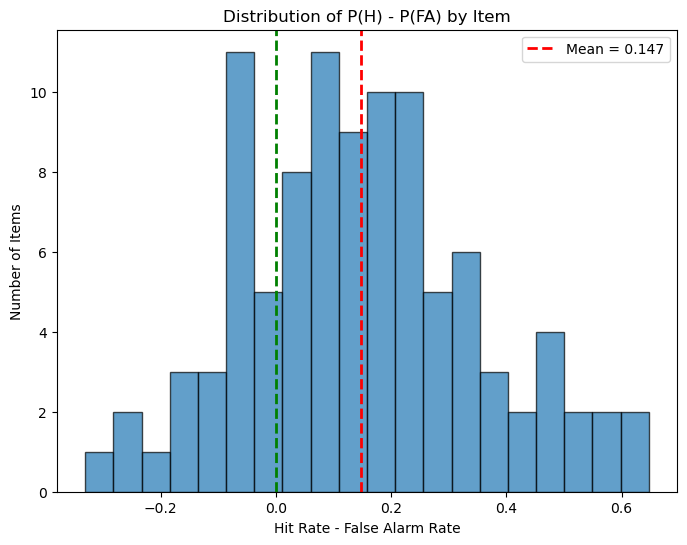

In [160]:
# p(H) - p(FA) plot by item
# df_by_item_wide = df_by_item.pivot(index="image_id", columns="resp_type", values="prop_yes")

plt.figure(figsize=(8, 6))
plt.hist(df_by_item_wide['Hit'] - df_by_item_wide['FA'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(0, color='green', linestyle='dashed', linewidth=2)
plt.axvline((df_by_item_wide['Hit'] - df_by_item_wide['FA']).mean(), 
            color='red', linestyle='dashed', linewidth=2,
            label=f'Mean = {(df_by_item_wide["Hit"] - df_by_item_wide["FA"]).mean():.3f}')
plt.xlabel("Hit Rate - False Alarm Rate")
plt.ylabel("Number of Items")
plt.title("Distribution of P(H) - P(FA) by Item")
plt.legend()
plt.show()

In [161]:
# convert resp_type to categorical
df_by_item['resp_type'] = df_by_item['resp_type'].astype('category')

In [162]:
# Simple linear regression: Y ~ X
m1 = smf.ols("prop_yes ~ distinct_rating*resp_type", data=df_by_item).fit()

print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_yes   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     54.21
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.46e-25
Time:                        22:36:52   Log-Likelihood:                 113.66
No. Observations:                 200   AIC:                            -219.3
Df Residuals:                     196   BIC:                            -206.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [163]:
# Test H0: slope_Hit = 0
m1.t_test("distinct_rating + distinct_rating:resp_type[T.Hit] = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0028      0.008     -0.374      0.709      -0.018       0.012

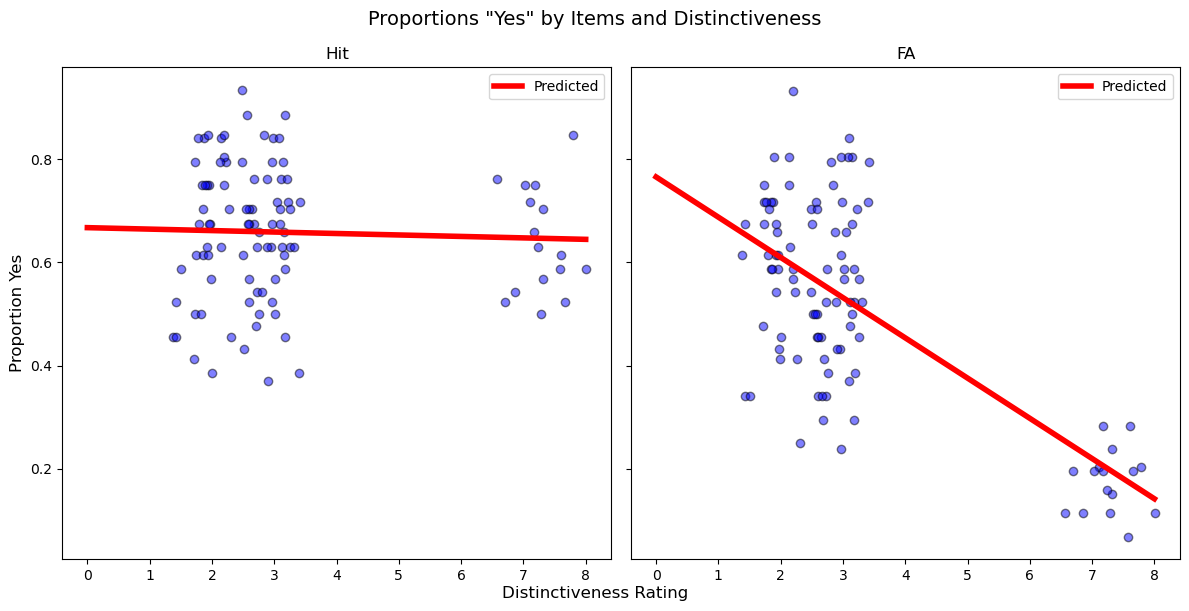

In [164]:
# Make two facets side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

# Subset the data
hit_data = df_by_item[df_by_item["resp_type"] == "Hit"]
fa_data  = df_by_item[df_by_item["resp_type"] == "FA"]

# Scatter plots
axes[0].scatter(hit_data["distinct_rating"], hit_data["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[1].scatter(fa_data["distinct_rating"], fa_data["prop_yes"], alpha=0.5, edgecolor="k", color="blue")


for ax, data, title in zip(
    axes, 
    [hit_data, fa_data], 
    ["Hit", "FA"]
    ):
    
    X = pd.DataFrame({
        "resp_type": np.repeat(title, 9),       # repeat each category
        "distinct_rating": list(range(0, 9)) # 0–8 for each category
        })
    y = m1.predict(X)
    
    ax.plot(X["distinct_rating"], y, color="red", linewidth=4, label="Predicted")
    ax.set_title(title)
    ax.legend()

# Labels
axes[0].set_ylabel("Proportion Yes", fontsize=12)
fig.text(0.5, 0, "Distinctiveness Rating", ha="center", fontsize=12)
fig.suptitle('Proportions "Yes" by Items and Distinctiveness', fontsize=14)

plt.tight_layout()
plt.show()

In [165]:
# also by group
m1_by_group = smf.ols("prop_yes ~ distinct_rating*resp_type*group", data=df_by_item).fit()

print(m1_by_group.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_yes   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     24.01
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.66e-23
Time:                        22:36:53   Log-Likelihood:                 116.12
No. Observations:                 200   AIC:                            -216.2
Df Residuals:                     192   BIC:                            -189.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

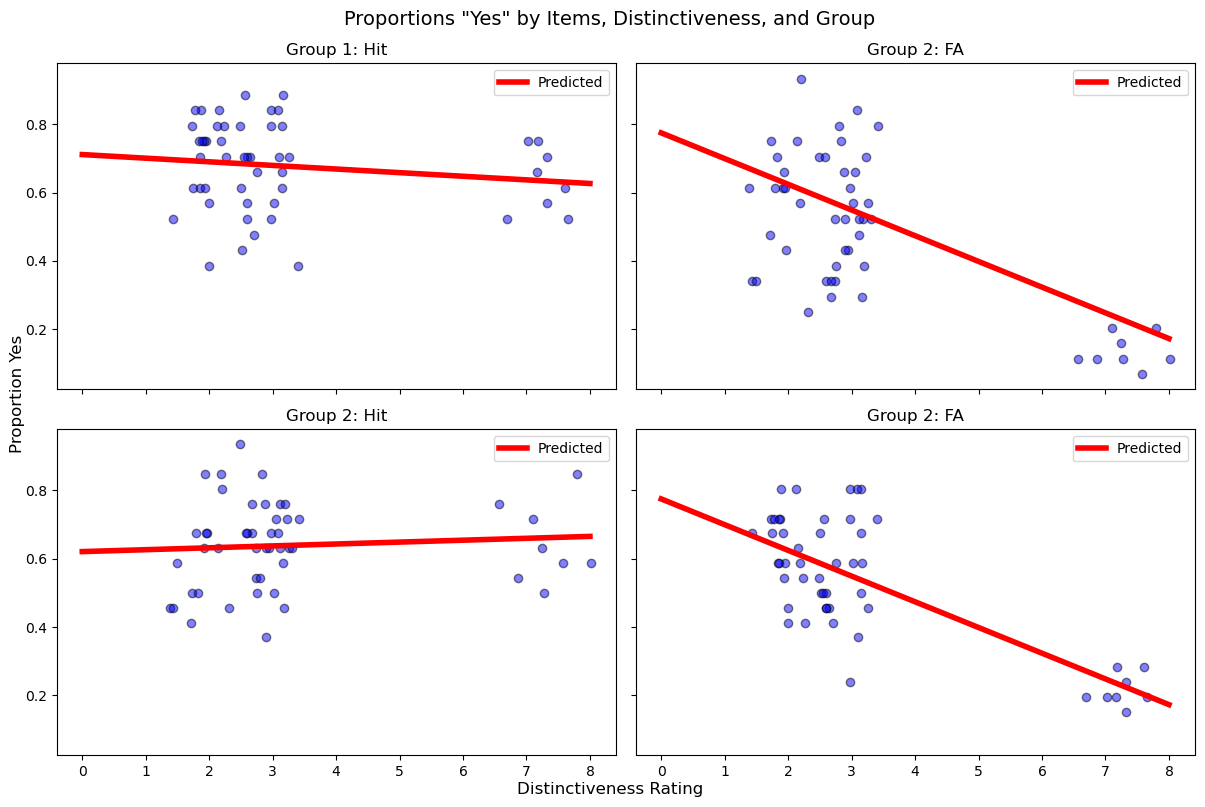

In [166]:
# Make two facets side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
axes = axes.ravel()  # flatten to 1D array

# Subset the data
hit_data1 = df_by_item[(df_by_item["resp_type"] == "Hit") & (df_by_item["group"] == "Group1")]
fa_data1  = df_by_item[(df_by_item["resp_type"] == "FA") & (df_by_item["group"] == "Group1")]
hit_data2 = df_by_item[(df_by_item["resp_type"] == "Hit") & (df_by_item["group"] == "Group2")]
fa_data2  = df_by_item[(df_by_item["resp_type"] == "FA") & (df_by_item["group"] == "Group2")]


# Scatter plots
axes[0].scatter(hit_data1["distinct_rating"], hit_data1["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[1].scatter(fa_data1["distinct_rating"], fa_data1["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[2].scatter(hit_data2["distinct_rating"], hit_data2["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[3].scatter(fa_data2["distinct_rating"], fa_data2["prop_yes"], alpha=0.5, edgecolor="k", color="blue")


for ax, data in zip(
    axes, 
    [hit_data1, fa_data2, hit_data2, fa_data2]
    ):
    
    X = pd.DataFrame({
        "resp_type": np.repeat(data['resp_type'].unique(), 9),       # repeat each category,
        "group": np.repeat( data['group'].unique(), 9 ),
        "distinct_rating": list(range(0, 9)) # 0–8 for each category
        })
    y = m1_by_group.predict(X)
    
    ax.plot(X["distinct_rating"], y, color="red", linewidth=4, label="Predicted")
    gr = ''.join([c for c in data['group'].unique()[0] if c.isdigit()])
    resp_type = data['resp_type'].unique()[0]
    title = f"Group {gr}: {resp_type}"
    ax.set_title(title)
    ax.legend()

# Labels
fig.text(0.5, 0, "Distinctiveness Rating", ha="center", fontsize=12)
fig.text(0, 0.5, "Proportion Yes", va="center", rotation="vertical", fontsize=12)
fig.suptitle('Proportions "Yes" by Items, Distinctiveness, and Group', fontsize=14)

plt.tight_layout()
plt.show()

# Split-Half

In [167]:
# add response types to filtered_data_test
conditions = [
    (filtered_data_test['item_type'] == 'Target') & (filtered_data_test['cor_ans'] == True),
    (filtered_data_test['item_type'] == 'Target') & (filtered_data_test['cor_ans'] == False),
    (filtered_data_test['item_type'] == 'Foil') & (filtered_data_test['cor_ans'] == True),
    (filtered_data_test['item_type'] == 'Foil') & (filtered_data_test['cor_ans'] == False),
]

choices = ['Hit', 'Miss', 'CR', 'FA']

filtered_data_test['resp_type'] = np.select(conditions, choices, default=np.nan)
filtered_data_test

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating,distinct_type,resp_type
107,107,90163,Group2,test_phase,Target,l,l,True,1986.0,Gneiss,13,M,M_Gneiss_14.png,206,3.41,Bottom,Hit
109,109,90163,Group2,test_phase,Foil,a,a,True,1453.0,Gneiss,13,M,M_Gneiss_06.png,198,2.65,Bottom,CR
111,111,90163,Group2,test_phase,Target,l,l,True,1956.0,Marble,15,M,M_Marble_14.png,238,3.31,Bottom,Hit
113,113,90163,Group2,test_phase,Target,l,l,True,1035.0,Phyllite,17,M,M_Phyllite_13.png,269,2.80,Bottom,Hit
115,115,90163,Group2,test_phase,Target,l,l,True,1156.0,Gneiss,13,M,M_Gneiss_10.png,202,3.09,Bottom,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,297,88914,Group1,test_phase,Target,a,l,False,760.0,Basalt,2,I,I_Basalt_01.png,17,1.92,Bottom,Miss
13193,299,88914,Group1,test_phase,Target,l,l,True,1985.0,Diorite,3,I,I_Diorite_05.png,37,3.08,Bottom,Hit
13195,301,88914,Group1,test_phase,Foil,l,a,False,1573.0,Andesite,1,I,I_Andesite_09.png,9,2.49,Bottom,FA
13197,303,88914,Group1,test_phase,Target,l,l,True,552.0,Diorite,3,I,I_Diorite_04.png,36,2.98,Bottom,Hit


In [168]:
# ---------- Hits data for split-half reliability analysis ----------


# ---------- Group 1 ----------

sh_df_hits_gr1_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group1') & (filtered_data_test['item_type']=='Target'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_hits_gr1_long['is_hit'] = np.where(sh_df_hits_gr1_long['resp_type']=='Hit', 1, 0)  
sh_df_hits_gr1_long = sh_df_hits_gr1_long[['subject_id', 'image_id', 'is_hit']]  
# pivot a table wider
sh_df_hits_gr1 = sh_df_hits_gr1_long.pivot(index='image_id', columns='subject_id', values='is_hit')


# ---------- Group 2 ----------

sh_df_hits_gr2_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group2') & (filtered_data_test['item_type']=='Target'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_hits_gr2_long['is_hit'] = np.where(sh_df_hits_gr2_long['resp_type']=='Hit', 1, 0)  
sh_df_hits_gr2_long = sh_df_hits_gr2_long[['subject_id', 'image_id', 'is_hit']]  
# pivot a table wider
sh_df_hits_gr2 = sh_df_hits_gr2_long.pivot(index='image_id', columns='subject_id', values='is_hit')

In [169]:
# ---------- FA data for split-half reliability analysis ----------


# ---------- Group 1 ----------

sh_df_fa_gr1_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group1') & (filtered_data_test['item_type']=='Foil'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_fa_gr1_long['is_fa'] = np.where(sh_df_fa_gr1_long['resp_type']=='FA', 1, 0)  
sh_df_fa_gr1_long
sh_df_fa_gr1_long = sh_df_fa_gr1_long[['subject_id', 'image_id', 'is_fa']]  
# # pivot a table wider
sh_df_fa_gr1 = sh_df_fa_gr1_long.pivot(index='image_id', columns='subject_id', values='is_fa')


# ---------- Group 2 ----------

sh_df_fa_gr2_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group2') & (filtered_data_test['item_type']=='Foil'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_fa_gr2_long['is_fa'] = np.where(sh_df_fa_gr2_long['resp_type']=='FA', 1, 0)  
sh_df_fa_gr2_long = sh_df_fa_gr2_long[['subject_id', 'image_id', 'is_fa']]  
# pivot a table wider
sh_df_fa_gr2 = sh_df_fa_gr2_long.pivot(index='image_id', columns='subject_id', values='is_fa')

In [170]:
# Loop over Hits
n_iterations = 10000
sh_corrs_hits = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_hits_gr1.columns)
    shuffled_df_1 = sh_df_hits_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_hits_gr2.columns)
    shuffled_df_2 = sh_df_hits_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_hits.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


In [171]:
# Loop over Hits randomly
n_iterations = 10000
sh_corrs_hits_random = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_hits_gr1.columns)
    shuffled_df_1 = sh_df_hits_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_hits_gr2.columns)
    shuffled_df_2 = sh_df_hits_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Randomly shuffle one half to break any real association
    mean_second_half = mean_second_half.sample(frac=1)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_hits_random.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


In [172]:
# Loop over FAs
n_iterations = 10000
sh_corrs_fa = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_fa_gr1.columns)
    shuffled_df_1 = sh_df_fa_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_fa_gr2.columns)
    shuffled_df_2 = sh_df_fa_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_fa.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


In [173]:
# Loop over FAs randomly
n_iterations = 10000
sh_corrs_fa_random = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_fa_gr1.columns)
    shuffled_df_1 = sh_df_fa_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_fa_gr2.columns)
    shuffled_df_2 = sh_df_fa_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Randomly shuffle one half to break any real association
    mean_second_half = mean_second_half.sample(frac=1)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_fa_random.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


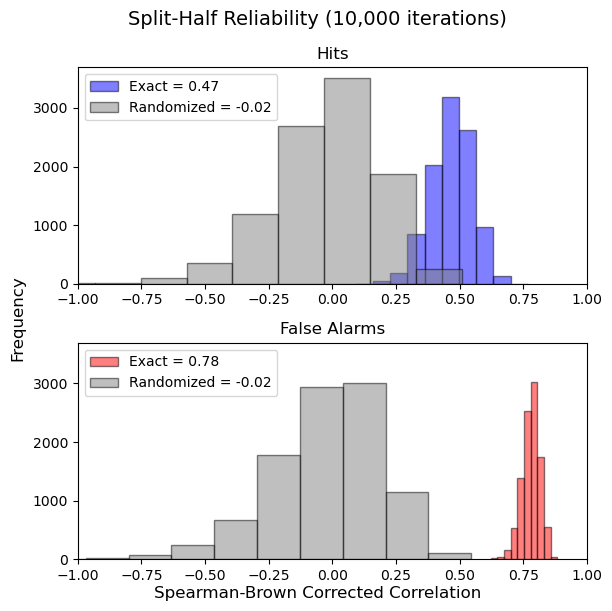

In [174]:
n_bins = 10

fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True,sharey=True)

# Hits
axes[0].hist(sh_corrs_hits, color='blue', alpha=0.5, edgecolor='black', 
             label=f'Exact = {np.mean(sh_corrs_hits):.2f}',
             bins=n_bins)
#axes[0].axvline(np.mean(sh_corrs_hits), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean Hits = {np.mean(sh_corrs_hits):.3f}')
axes[0].hist(sh_corrs_hits_random, color='gray', alpha=0.5, edgecolor='black', 
             label=f'Randomized = {np.mean(sh_corrs_hits_random):.2f}', 
             bins=n_bins)
#axes[0].axvline(np.mean(sh_corrs_hits_random), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean Randomized = {np.mean(sh_corrs_hits_random):.3f}')
axes[0].tick_params(labelbottom=True) # show x labels only on the upper plot
axes[0].set_title('Hits')
#axes[0].set_ylabel("Frequency")
axes[0].legend()

# FAs
axes[1].hist(sh_corrs_fa, color='red', alpha=0.5, edgecolor='black', 
             label=f'Exact = {np.mean(sh_corrs_fa):.2f}',
             bins=n_bins)
#axes[1].axvline(np.mean(sh_corrs_fa), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean FAs = {np.mean(sh_corrs_fa):.3f}')
axes[1].hist(sh_corrs_fa_random, color='gray', alpha=0.5, edgecolor='black', 
             label=f'Randomized = {np.mean(sh_corrs_fa_random):.2f}', 
             bins=n_bins)
#axes[1].axvline(np.mean(sh_corrs_fa_random), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean Randomized = {np.mean(sh_corrs_fa_random):.3f}')
axes[1].set_title('False Alarms')
#axes[1].set_xlabel("Spearman-Brown Corrected Correlation")
axes[1].legend()

plt.xlim(-1, 1)
fig.text(0.5, 0, 'Spearman-Brown Corrected Correlation', ha='center', fontsize=12)
fig.text(0, 0.4, 'Frequency', ha='center', fontsize=12, rotation='vertical')
plt.suptitle("Split-Half Reliability (10,000 iterations)", fontsize=14)
plt.tight_layout()
plt.show()

# Hit vs FA Correlations by Distinctiveness

In [175]:
# wider format with Hit and FA columns
df_by_item_wide = (df_by_item[['image_id','category_name',
                                'distinct_rating','prop_yes',
                                'resp_type', 'distinct_type']]
                    .pivot(index = ['image_id', 'category_name', 'distinct_rating', 'distinct_type'], 
                            columns='resp_type', values='prop_yes')
                    .reset_index()
                    )
df_by_item_wide

resp_type,image_id,category_name,distinct_rating,distinct_type,FA,Hit
0,3,Andesite,3.17,Bottom,0.295455,0.586957
1,4,Andesite,3.18,Bottom,0.522727,0.456522
2,6,Andesite,3.17,Bottom,0.586957,0.886364
3,8,Andesite,1.95,Bottom,0.586957,0.750000
4,9,Andesite,2.49,Bottom,0.704545,0.934783
...,...,...,...,...,...,...
95,466,Shale,2.90,Bottom,0.431818,0.369565
96,467,Shale,1.95,Bottom,0.613636,0.673913
97,471,Shale,2.73,Bottom,0.522727,0.630435
98,472,Shale,2.55,Bottom,0.500000,0.704545


In [176]:
# q25, q75 = df_by_item_wide['distinct_rating'].quantile([0.25, 0.75])
# df_by_item_wide['distinct_group'] = df_by_item_wide['distinct_rating'].map(lambda x: 
#     'Top' if x >= q75 else ('Bottom' if x <= q25 else 'Middle')
#     )
# df_by_item_wide

In [177]:
# # for a larger version of the plot
# df_by_item['distinct_group'] = df_by_item['distinct_rating'].map(lambda x: 
#     'Top' if x >= q75 else ('Bottom' if x <= q25 else 'Middle')
#     )
# df_by_item

In [178]:
# Convert categorical to string, then create composite column
df_by_item['resp_group'] = df_by_item['resp_type'].astype(str) + '_' + df_by_item['group'].astype(str)

# Then pivot using this new column, including distinct_group in the index
df_by_item_wide = (df_by_item[['image_id', 'category_name', 
                                'distinct_rating', 'distinct_type',
                                'prop_yes', 'resp_group']]
                    .pivot(index=['image_id', 'category_name', 'distinct_rating', 'distinct_type'], 
                           columns='resp_group', 
                           values='prop_yes')
                    .reset_index()
                    )

df_by_item_wide

resp_group,image_id,category_name,distinct_rating,distinct_type,FA_Group1,FA_Group2,Hit_Group1,Hit_Group2
0,3,Andesite,3.17,Bottom,0.295455,NaN,NaN,0.586957
1,4,Andesite,3.18,Bottom,0.522727,NaN,NaN,0.456522
2,6,Andesite,3.17,Bottom,NaN,0.586957,0.886364,NaN
3,8,Andesite,1.95,Bottom,NaN,0.586957,0.750000,NaN
4,9,Andesite,2.49,Bottom,0.704545,NaN,NaN,0.934783
...,...,...,...,...,...,...,...,...
95,466,Shale,2.90,Bottom,0.431818,NaN,NaN,0.369565
96,467,Shale,1.95,Bottom,0.613636,NaN,NaN,0.673913
97,471,Shale,2.73,Bottom,0.522727,NaN,NaN,0.630435
98,472,Shale,2.55,Bottom,NaN,0.500000,0.704545,NaN


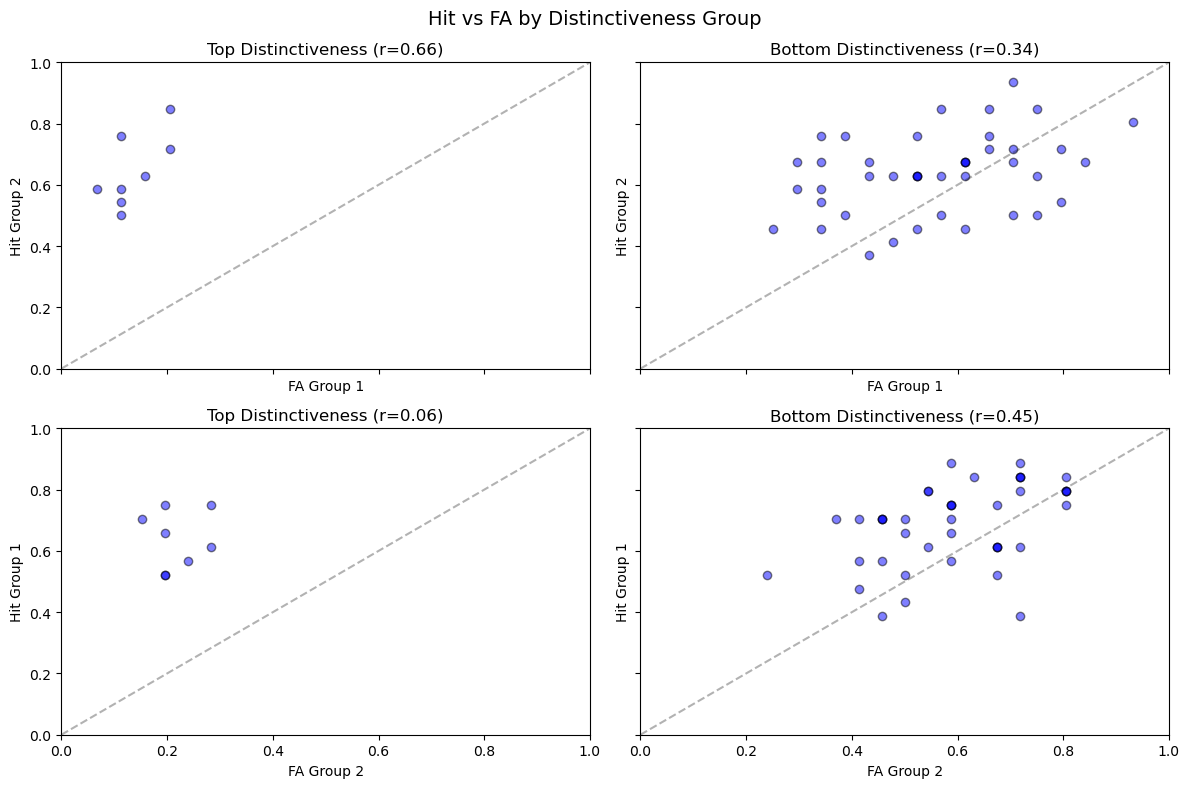

In [179]:
# Hit vs FA by Distinctiveness Group

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
axes = axes.ravel()  # flatten to 1D array

# Subplot 0 - Top
x0 = df_by_item.loc[(df_by_item['distinct_type']=='Top') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y0 = df_by_item.loc[(df_by_item['distinct_type']=='Top') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[0].scatter(x0, y0, alpha=0.5, edgecolor="k", color="blue")
axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask0 = ~(x0.isna() | y0.isna()) # not NAs
r0 = x0[mask0].corr(y0[mask0]) # Correlation
axes[0].set_xlabel('FA Group 1')
axes[0].set_ylabel('Hit Group 2')
axes[0].set_title(f'Top Distinctiveness (r={r0:.2f})')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

# Subplot 1 - Bottom
x1 = df_by_item.loc[(df_by_item['distinct_type']=='Bottom') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y1 = df_by_item.loc[(df_by_item['distinct_type']=='Bottom') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[1].scatter(x1, y1, alpha=0.5, edgecolor="k", color="blue")
axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask1 = ~(x1.isna() | y1.isna())
r1 = x1[mask1].corr(y1[mask1])
axes[1].set_xlabel('FA Group 1')
axes[1].set_ylabel('Hit Group 2')
axes[1].set_title(f'Bottom Distinctiveness (r={r1:.2f})')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

# Subplot 2 - Top
x3 = df_by_item.loc[(df_by_item['distinct_type']=='Top') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y3 = df_by_item.loc[(df_by_item['distinct_type']=='Top') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[2].scatter(x3, y3, alpha=0.5, edgecolor="k", color="blue")
axes[2].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask3 = ~(x3.isna() | y3.isna())
r3 = x3[mask3].corr(y3[mask3])
axes[2].set_xlabel('FA Group 2')
axes[2].set_ylabel('Hit Group 1')
axes[2].set_title(f'Top Distinctiveness (r={r3:.2f})')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)

# Subplot 3 - Bottom
x5 = df_by_item.loc[(df_by_item['distinct_type']=='Bottom') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y5 = df_by_item.loc[(df_by_item['distinct_type']=='Bottom') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[3].scatter(x5, y5, alpha=0.5, edgecolor="k", color="blue")
axes[3].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask5 = ~(x5.isna() | y5.isna())
r5 = x5[mask5].corr(y5[mask5])
axes[3].set_xlabel('FA Group 2')
axes[3].set_ylabel('Hit Group 1')
axes[3].set_title(f'Bottom Distinctiveness (r={r5:.2f})')
axes[3].set_xlim(0, 1)
axes[3].set_ylim(0, 1)

plt.suptitle('Hit vs FA by Distinctiveness Group', fontsize=14)
plt.tight_layout()
plt.show()

In [180]:
# # Highly distinctive items
# pd.merge(df_by_item.loc[df_by_item['distinct_group']=='Top',['image_id','category_name']],
#          filtered_data_test.loc[filtered_data_test['item_type']=='Target',['image_id','image_png']].drop_duplicates(),
#          on='image_id'
#         ).drop_duplicates().sort_values(by='image_png')

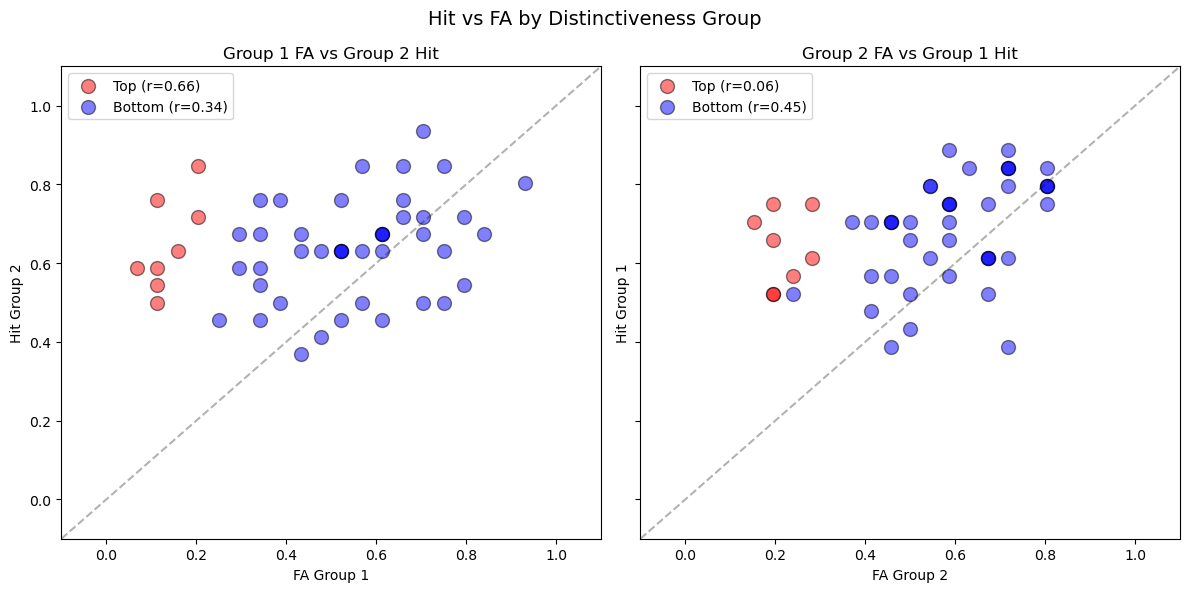

In [181]:
# Same plot but all in one with legend

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
axes = axes.ravel()  # flatten to 1D array

distinct_groups = ['Top', 'Bottom']
colors = ['red', 'blue']

for color, distinct in zip(colors, distinct_groups):
    
    x = df_by_item.loc[(df_by_item['distinct_type']==distinct) & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
    y = df_by_item.loc[(df_by_item['distinct_type']==distinct) & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
    # add correlation for this distinctiveness group
    mask = ~(x.isna() | y.isna())
    r = x[mask].corr(y[mask])
    axes[0].scatter(x, y, alpha=0.5, edgecolor="k", color = color, s = 100,
                    label=f"{distinct} (r={r:.2f})")
   
    
    x_rev = df_by_item.loc[(df_by_item['distinct_type']==distinct) & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
    y_rev = df_by_item.loc[(df_by_item['distinct_type']==distinct) & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
    # add correlation for this distinctiveness group
    mask_rev = ~(x_rev.isna() | y_rev.isna())
    r_rev = x_rev[mask_rev].corr(y_rev[mask_rev])
    axes[1].scatter(x_rev, y_rev, alpha=0.5, edgecolor="k",color = color, s = 100,
                    label=f"{distinct} (r={r_rev:.2f})")

axes[0].plot([-0.1, 1.1], [-0.1, 1.1], 'k--', alpha=0.3)
axes[0].set_xlabel('FA Group 1')
axes[0].set_ylabel('Hit Group 2')
axes[0].set_title('Group 1 FA vs Group 2 Hit')
axes[0].set_xlim(-0.1, 1.1)
axes[0].set_ylim(-0.1, 1.1)
axes[0].legend()

axes[1].plot([-0.1, 1.1], [-0.1, 1.1], 'k--', alpha=0.3)
axes[1].set_xlabel('FA Group 2')
axes[1].set_ylabel('Hit Group 1')
axes[1].set_title('Group 2 FA vs Group 1 Hit')
axes[1].set_xlim(-0.1, 1.1)
axes[1].set_ylim(-0.1, 1.1)
axes[1].legend()

plt.suptitle('Hit vs FA by Distinctiveness Group', fontsize=14)
plt.tight_layout()
plt.show()

# Hybrid-Similarity Model

Hybrid-Similarity Model. 

$$P( 'Old' | i) = P( 'Old' | F_i)$$

Where $P( 'Old' | F_i) = \frac{F_i}{F_i + k}$, where $k$ is a free parameter. 

$F_i = \sum_{j = 1}^{J} S_{ij}$, where $S_{ij}$ is the similarity between test item $i$ to all study items $j$. 

$S_{ij}$ is based on 
1. The distances between items $i$ and $j$ in the similarity space: $S_{ij} = e^{-c \times D}$ ($c$ is a free parameter, $D = \sqrt{ \sum_{m=1}^M (x_{im} - x_{jm})^2 } $ is the distance in the $M$-dimensional space)
2. And on the distinctivenes ratings: $S_{ii} = e^{\beta \times d_i}$, if $i$ is an old item and $S_{ij} = e^{- \alpha \times d_i}$, if $i$ is a new item, where $\alpha$ and $\beta$ are free parameters, and $d_i$ is the distinctiveness rating of item $i$.

In [182]:
# Load MDS solution
mds_solution = pd.read_csv('MDS8_solution.csv')
mds_solution

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,image_id
0,-2.757,-1.594,1.052,0.768,1.343,1.711,1.795,0.809,1
1,2.001,-0.754,1.405,-1.382,-1.384,0.976,-0.067,1.972,2
2,0.261,-0.508,-2.962,-0.608,0.009,-0.191,2.720,-1.224,3
3,0.382,-0.027,-0.148,-1.899,-1.948,1.862,0.968,0.986,4
4,0.288,2.013,-1.102,-1.285,0.344,-0.009,2.696,-0.174,5
...,...,...,...,...,...,...,...,...,...
475,0.749,-3.021,-1.908,-1.689,-0.493,4.441,-0.122,1.618,476
476,-0.054,-2.743,-1.435,-2.903,0.315,3.161,1.833,1.288,477
477,0.007,-2.077,-4.012,-1.633,-0.366,2.558,4.210,-0.060,478
478,0.177,-2.520,-2.293,-1.216,0.545,0.805,2.302,0.629,479


In [183]:
# study lists
study_list_gr1 = np.sort(filtered_data_memory.loc[filtered_data_memory['group']=='Group1', 'image_id'].unique())
study_list_gr2 = np.sort(filtered_data_memory.loc[filtered_data_memory['group']=='Group2', 'image_id'].unique())

# test list
test_list = np.sort(filtered_data_test['image_id'].unique())

In [184]:
# Calculate distances

# Step 1: Extract the MDS coordinates (first 8 columns)
# Make sure image_id is set as the index for easy lookup
mds_coords = mds_solution.set_index('image_id').iloc[:, :8]

# ------------- Group 1 ----------

# Step 2: Get row and column names from dist_mat_gr1
row_ids = test_list 
col_ids = study_list_gr1

# Step 3: Extract MDS coordinates for rows and columns
# This creates matrices where each row/column corresponds to the image_ids
mds_rows = mds_coords.loc[row_ids].values  # Shape: (240, 8)
mds_cols = mds_coords.loc[col_ids].values  # Shape: (120, 8)

# Step 4: Calculate Euclidean distances efficiently
# Using broadcasting: expand dimensions to compute all pairwise distances at once
# mds_rows[:, np.newaxis, :] has shape (240, 1, 8)
# mds_cols[np.newaxis, :, :] has shape (1, 120, 8)
# The difference has shape (240, 120, 8)
diff = mds_rows[:, np.newaxis, :] - mds_cols[np.newaxis, :, :]

# Calculate Euclidean distance: sqrt of sum of squared differences
distances = np.sqrt(np.sum(diff**2, axis=2))

# Step 5: Create a DataFrame with the same structure as dist_mat_gr1
dist_mat_gr1 = pd.DataFrame(
    distances,
    index=row_ids,
    columns=col_ids
)

# ------------- Group 2 ----------

# Step 2: Get row and column names from dist_mat_gr1
row_ids = test_list 
col_ids = study_list_gr2

# Step 3: Extract MDS coordinates for rows and columns
# This creates matrices where each row/column corresponds to the image_ids
mds_rows = mds_coords.loc[row_ids].values  # Shape: (240, 8)
mds_cols = mds_coords.loc[col_ids].values  # Shape: (120, 8)

# Step 4: Calculate Euclidean distances efficiently
# Using broadcasting: expand dimensions to compute all pairwise distances at once
# mds_rows[:, np.newaxis, :] has shape (240, 1, 8)
# mds_cols[np.newaxis, :, :] has shape (1, 120, 8)
# The difference has shape (240, 120, 8)
diff = mds_rows[:, np.newaxis, :] - mds_cols[np.newaxis, :, :]

# Calculate Euclidean distance: sqrt of sum of squared differences
distances = np.sqrt(np.sum(diff**2, axis=2))

# Step 5: Create a DataFrame with the same structure as dist_mat_gr1
dist_mat_gr2 = pd.DataFrame(
    distances,
    index=row_ids,
    columns=col_ids
)

In `dist_mat_gr1` (100x50) and `dist_mat_gr2` (100x50), each row is each test item (they are the **same** accross two matrices), and each column is each study item (they are **different** accross matrices).

In [185]:
# Calculate similarity matrices

def calculate_similarity_matrix(distance_matrix, c):
    """
    Calculate similarity matrix from distance matrix using exponential decay.
    
    Parameters:
    -----------
    distance_matrix : pd.DataFrame or np.ndarray
        Matrix of distances (240x120)
    c : float
        Decay constant for exponential transformation
    
    Returns:
    --------
    similarity_matrix : pd.DataFrame or np.ndarray
        Matrix of similarities with same shape and index/columns as input
    """
    # Calculate similarity: exp(-c * d_ij)
    similarity = np.exp(-c * distance_matrix)
    
    # If input is DataFrame, preserve index and columns
    if isinstance(distance_matrix, pd.DataFrame):
        similarity_matrix = pd.DataFrame(
            similarity,
            index=distance_matrix.index,
            columns=distance_matrix.columns
        )
    else:
        similarity_matrix = similarity
    
    return similarity_matrix

In [186]:
# Make a dictionary of distinctiveness (value) by image_id (key)
# [(image_id, distinctiveness), (..., ...)]
distinctiveness_image_id = df_by_item.set_index('image_id')['distinct_rating'].to_dict()
# print first 5 items
list(distinctiveness_image_id.items())[:5]

[(3, 3.17), (4, 3.18), (6, 3.17), (8, 1.95), (9, 2.49)]

In [187]:
def transform_similarity_matrix(alpha, beta, similarity_matrix, distinctiveness_dict = distinctiveness_image_id):
    """
    Transform similarity matrix based on distinctiveness ratings.
    
    Parameters:
    -----------
    similarity_matrix : pd.DataFrame
        Similarity matrix (240x120) with image_ids as index and columns
    distinctiveness_image_id : dict
        Dictionary mapping image_id to distinctiveness rating
    alpha : float
        Free parameter for off-diagonal transformation
    beta : float
        Free parameter for diagonal transformation (where row_id == col_id)
    
    Returns:
    --------
    transformed_matrix : pd.DataFrame
        Transformed similarity matrix with same shape and index/columns
    """
    # Create a copy to avoid modifying the original
    transformed = similarity_matrix.copy()
    
    # Iterate through each row
    for row_id in transformed.index:
        # Get distinctiveness for this row's image
        distinct_i = distinctiveness_dict[row_id]
        
        # Iterate through each column
        for col_id in transformed.columns:
            s_ij = similarity_matrix.loc[row_id, col_id]
            
            if row_id == col_id:
                # Self-similarity case: exp(beta * distinct_i)
                # Since s_ii = 1
                transformed.loc[row_id, col_id] = np.exp(beta * distinct_i)
            else:
                # Similarity between different items (item i and item j) case
                # s_ij * exp(-alpha * distinct_i)
                transformed.loc[row_id, col_id] = np.exp(-alpha * distinct_i) * s_ij
    
    return transformed

## For each individual

In [188]:
# For NegLogLikelihood calculation
filtered_data_test['responded_old'] = np.where(filtered_data_test['response'] == "l", 1, 0)
filtered_data_test

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating,distinct_type,resp_type,responded_old
107,107,90163,Group2,test_phase,Target,l,l,True,1986.0,Gneiss,13,M,M_Gneiss_14.png,206,3.41,Bottom,Hit,1
109,109,90163,Group2,test_phase,Foil,a,a,True,1453.0,Gneiss,13,M,M_Gneiss_06.png,198,2.65,Bottom,CR,0
111,111,90163,Group2,test_phase,Target,l,l,True,1956.0,Marble,15,M,M_Marble_14.png,238,3.31,Bottom,Hit,1
113,113,90163,Group2,test_phase,Target,l,l,True,1035.0,Phyllite,17,M,M_Phyllite_13.png,269,2.80,Bottom,Hit,1
115,115,90163,Group2,test_phase,Target,l,l,True,1156.0,Gneiss,13,M,M_Gneiss_10.png,202,3.09,Bottom,Hit,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,297,88914,Group1,test_phase,Target,a,l,False,760.0,Basalt,2,I,I_Basalt_01.png,17,1.92,Bottom,Miss,0
13193,299,88914,Group1,test_phase,Target,l,l,True,1985.0,Diorite,3,I,I_Diorite_05.png,37,3.08,Bottom,Hit,1
13195,301,88914,Group1,test_phase,Foil,l,a,False,1573.0,Andesite,1,I,I_Andesite_09.png,9,2.49,Bottom,FA,1
13197,303,88914,Group1,test_phase,Target,l,l,True,552.0,Diorite,3,I,I_Diorite_04.png,36,2.98,Bottom,Hit,1


In [189]:
# Different parameters for different groups

def individ_hib_sim_model(parameters, 
                          data, 
                          distances_mats_list = [dist_mat_gr1, dist_mat_gr2], 
                          distinctiveness_dict = distinctiveness_image_id):
    """
    Hibrid-similarity model to predict P(Old|Item) based on distances in the similarity space and their distinctiveness.
    
    Parameters:
    -----------
    parameters : list or np.ndarray
        List of parameters [c, alpha, beta, k]
    data : pd.DataFrame
        Long DataFrame with columns: 'group', 'image_id'
    distances_mat : list of pd.DataFrame
        A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
    distinctiveness_dict : dict
        Dictionary mapping image_id to distinctiveness rating
    
    Returns:
    --------
    predictions : list
        List of predicted probabilities P(Old|Item) for each row in data
    """
    # parameters
    c, alpha, beta, k = parameters
    
    # get group name
    group = data['group'].unique()[0]
    groupN = 0 if group == 'Group1' else 1
    
    # Distances matrices
    distances_mat = distances_mats_list[groupN]
    
    # (Raw) Similarity matrices
    similarity_mat = calculate_similarity_matrix(distances_mat, c)
    
    # Transformed Similarity matrices
    similarity_mat_transformed = transform_similarity_matrix(alpha=alpha, beta=beta, 
                                                                 similarity_matrix=similarity_mat, 
                                                                 distinctiveness_dict=distinctiveness_dict)
    
    # Familiarity values for groups
    familiarity = np.sum(similarity_mat_transformed, axis=1)
    
    # iterate over rows in filtered_data_test to get familiarity for each item and subject
    familiarities = []
    for _, row in data.iterrows():
        image_id = row['image_id']
        familiarity_i_subj = familiarity.loc[familiarity.index == image_id]        
        familiarities.append(familiarity_i_subj.values[0] if not familiarity_i_subj.empty else np.nan)
    
    # Predicted proportions of "Old" responses ("Yes")
    predictions = [fam / (fam + k) for fam in familiarities]
    
    return predictions    

# Recollection Model

Recollection Model. 

$$P( 'Old' | i) = P_{recollect} + (1 - P_{recollect}) \times P( 'Old' | F_i)$$

Where $P( 'Old' | F_i) = \frac{F_i}{F_i + k}$, where $k$ is a free parameter. 

$F_i = \sum_{j = 1}^{J} S_{ij}$, where $S_{ij}$ is the similarity between test item $i$ to all study items $j$. 

$S_{ij}$ is based on 
1. The distances between items $i$ and $j$ in the similarity space: $S_{ij} = e^{-c \times D}$ ($c$ is a free parameter, $D = \sqrt{ \sum_{m=1}^M (x_{im} - x_{jm})^2 } $ is the distance in the $M$-dimensional space)
2. And on the distinctivenes ratings: $S_{ii} = e^{\beta \times d_i}$, if $i$ is an old item and $S_{ij} = e^{- \alpha \times d_i}$, if $i$ is a new item, where $\alpha$ and $\beta$ are free parameters, and $d_i$ is the distinctiveness rating of item $i$.

The recollection part is $P_{recollect} = P_{sample} \times P_{recover}$ where: 

- $P_{sample} = \frac{ S_{ii} }{ \sum_{j} S_{ij}} = \frac{ e^{\beta \times d_i} }{ F_i}$
- $P_{recover} = \frac{S_{ii}}{S_{ii} + k_{recollect}} = \frac{e^{\beta \times d_i}}{S_{ii} + k_{recollect}}$, where $k_{recollect}$ is a free parameter.



In [191]:
# Different parameters for different groups

def recollection_model(parameters, 
                          data, 
                          distances_mats_list = [dist_mat_gr1, dist_mat_gr2], 
                          distinctiveness_dict = distinctiveness_image_id):
    """
    Recollection-Familiarity model to predict P("Yes" | Item i) based on distances in the similarity space and their distinctiveness.
    
    Recollection component added is based on the self-similarity values.
    
    Parameters:
    -----------
    parameters : list or np.ndarray
        List of parameters [c, alpha, beta, k, k_recollect]
    data : pd.DataFrame
        Long DataFrame with columns: 'group', 'image_id'
    distances_mat : list of pd.DataFrame
        A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
    distinctiveness_dict : dict
        Dictionary mapping image_id to distinctiveness rating
    
    Returns:
    --------
    predictions : list
        List of predicted probabilities P(Old|Item) for each row in data
    """
    # parameters
    c, alpha, beta, k, k_recollect = parameters
    
    # get group name
    group = data['group'].unique()[0]
    groupN = 0 if group == 'Group1' else 1
    
    # Distances matrices
    distances_mat = distances_mats_list[groupN]
    
    # (Raw) Similarity matrices
    similarity_mat = calculate_similarity_matrix(distances_mat, c)
    
    # Transformed Similarity matrices
    similarity_mat_transformed = transform_similarity_matrix(alpha=alpha, beta=beta, 
                                                                 similarity_matrix=similarity_mat, 
                                                                 distinctiveness_dict=distinctiveness_dict)
    
    # Familiarity values for groups (aka summed similarities)
    familiarity = np.sum(similarity_mat_transformed, axis=1)
    
    # Extract self-similarities
    self_similarities = []
    for i in range(similarity_mat_transformed.shape[0]):
        is_old = np.sum(similarity_mat_transformed.index[i] == similarity_mat_transformed.columns) > 0
        idx = similarity_mat_transformed.index[i]
        if is_old:
            self_similarities.append(similarity_mat_transformed.loc[idx, idx]) # self-match value
        else:
            self_similarities.append(0) # no recollection
    
    # Calclulate recollection components:
    p_sample = np.array(self_similarities) / familiarity.values
    p_recover = np.array(self_similarities) / (np.array(self_similarities) + k_recollect)
    p_recollect = p_sample * p_recover
    # make into a pd.Series (with index)
    p_recollect = pd.Series(p_recollect, index=similarity_mat_transformed.index)
    
    # iterate over rows in filtered_data_test to get familiarity and recollections
    # for each item and subject in the right order
    familiarities = []
    recollections = []
    for _, row in data.iterrows():
        image_id = row['image_id']
        familiarity_i_subj = familiarity.loc[familiarity.index == image_id]        
        familiarities.append(familiarity_i_subj.values[0] if not familiarity_i_subj.empty else np.nan)
        recollection_i_subj = p_recollect.loc[p_recollect.index == image_id]
        recollections.append(recollection_i_subj.values[0] if not recollection_i_subj.empty else np.nan)
    
    # Predicted proportions of "Old" responses ("Yes"): p(yes)
    predictions = [rec + (1 - rec) * ( fam / (fam + k) ) for fam, rec in zip(familiarities,recollections)]
    
    return predictions    

# Optimization

In [199]:
def NegLogLikelihood(parameters,
                     model_function,
                     df_observed = filtered_data_test.loc[filtered_data_test["group"]=="Group1"], 
                     distances_mats_list = [dist_mat_gr1, dist_mat_gr2], 
                     distinctiveness_dict = distinctiveness_image_id):
    """
    Calculate the negative log-likelihood of the observed data given the model predictions.
    
    Parameters:
    -----------
    parameters : list or np.ndarray
        List of parameters [c, alpha, beta, k]
    df_observed : pd.DataFrame
        DataFrame containing observed proportions with columns ['image_id', 'is_yes', 'group']
    distances_mats_list : list of pd.DataFrame
        A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
    distinctiveness_dict : dict
        Dictionary mapping image_id to distinctiveness rating
    Returns:
    --------
    neg_log_likelihood : float
        Negative log-likelihood value
    """
    # Get model predictions
    predicted = model_function(parameters, df_observed, distances_mats_list, distinctiveness_dict)
    
    # Merge observed and predicted data
    df_merged = df_observed.copy()
    df_merged['prop_yes_pred'] = predicted
    
    # Avoid log(0) by clipping predicted probabilities
    epsilon = 1e-10
    df_merged['prop_yes_pred'] = df_merged['prop_yes_pred'].clip(epsilon, 1 - epsilon)
    
    # Calculate log-likelihood for each observation
    df_merged['log_likelihood'] = (
        df_merged['responded_old'] * np.log(df_merged['prop_yes_pred']) +
        (1 - df_merged['responded_old']) * np.log(1 - df_merged['prop_yes_pred'])
                                   )
    # Sum log-likelihoods and return negative value
    neg_log_likelihood = -df_merged['log_likelihood'].sum()
    
    return neg_log_likelihood

## Hybrid-Similarity Model Optimization

In [202]:
initial_params = [0.1, 0.1, 0.1, 0.1]  # c, alpha, beta, k

# Set bounds for parameters (optional but recommended)
bounds = [
    (0, None),      # c >= 0
    (0, None),      # alpha >= 0
    (0, None),      # beta >= 0
    (0, None)      # k >= 0
]

# Optimize
np.random.seed(1)  # For reproducibility
individ_hs_optim_gr1 = minimize(
    NegLogLikelihood,
    initial_params,
    args=(individ_hib_sim_model,filtered_data_test.loc[filtered_data_test["group"]=="Group1"]),
    method='L-BFGS-B',  # Good for bounded optimization
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000},
)

# # Get optimized parameters
# individ_optimal_params_gr1 = individ_hs_optim_gr1.x
# c_opt_ind_gr1, alpha_opt_ind_gr1, beta_opt_ind_gr1, k_opt_ind_gr1 = individ_optimal_params_gr1

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58324D+03    |proj g|=  8.56692D+03

At iterate    1    f=  1.33503D+03    |proj g|=  7.38664D+00

At iterate    2    f=  1.33096D+03    |proj g|=  3.43401D+01

At iterate    3    f=  1.32810D+03    |proj g|=  6.49885D+01

At iterate    4    f=  1.32647D+03    |proj g|=  6.79973D+01

At iterate    5    f=  1.32422D+03    |proj g|=  5.52180D+01

At iterate    6    f=  1.32053D+03    |proj g|=  5.52799D+01

At iterate    7    f=  1.31926D+03    |proj g|=  4.04765D+01

At iterate    8    f=  1.31885D+03    |proj g|=  2.06130D+01

At iterate    9    f=  1.31867D+03    |proj g|=  1.57326D+01

At iterate   10    f=  1.31860D+03    |proj g|=  1.62256D+01

At iterate   11    f=  1.31780D+03    |proj g|=  1.90572D+01

At iterate   12    f=  1.31689D+03    |proj g|=  2.03094D+01

At iterate   13    f=  1.3

In [203]:
# Get optimized parameters
individ_optimal_params_gr1 = individ_hs_optim_gr1.x
c_opt_ind_gr1, alpha_opt_ind_gr1, beta_opt_ind_gr1, k_opt_ind_gr1 = individ_optimal_params_gr1

print(f"Optimal parameters for group 1:")
print(f"  c: {c_opt_ind_gr1}")
print(f"  alpha: {alpha_opt_ind_gr1}")
print(f"  beta: {beta_opt_ind_gr1}")
print(f"  k: {k_opt_ind_gr1}")
print(f"  NLL: {individ_hs_optim_gr1.fun}")
print(f"  Success: {individ_hs_optim_gr1.success}")

Optimal parameters for group 1:
  c: 0.4913872850180808
  alpha: 0.19402701290788932
  beta: 0.159051976782027
  k: 1.9836265372135022
  NLL: 1313.5678038018386
  Success: True


In [204]:
initial_params = [0.1, 0.1, 0.1, 0.1]  # c, alpha, beta, k

# Set bounds for parameters (optional but recommended)
bounds = [
    (0, None),      # c >= 0
    (0, None),      # alpha >= 0
    (0, None),      # beta >= 0
    (0, None)      # k >= 0
]

# Optimize
np.random.seed(1)  # For reproducibility
individ_hs_optim_gr2 = minimize(
    NegLogLikelihood,
    initial_params,
    args=(individ_hib_sim_model,filtered_data_test.loc[filtered_data_test["group"]=="Group2"]),
    method='L-BFGS-B',  # Good for bounded optimization
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000},
)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77694D+03    |proj g|=  8.91035D+03

At iterate    1    f=  1.46934D+03    |proj g|=  8.10473D-01

At iterate    2    f=  1.46145D+03    |proj g|=  4.11238D+01

At iterate    3    f=  1.45668D+03    |proj g|=  1.00350D+02

At iterate    4    f=  1.45315D+03    |proj g|=  1.27285D+02

At iterate    5    f=  1.44607D+03    |proj g|=  1.28678D+02

At iterate    6    f=  1.43830D+03    |proj g|=  1.68862D+02

At iterate    7    f=  1.43603D+03    |proj g|=  7.64951D+01

At iterate    8    f=  1.43481D+03    |proj g|=  3.76675D+01

At iterate    9    f=  1.43442D+03    |proj g|=  1.34139D+01

At iterate   10    f=  1.43436D+03    |proj g|=  1.17895D+01

At iterate   11    f=  1.43430D+03    |proj g|=  9.56006D+00

At iterate   12    f=  1.43419D+03    |proj g|=  6.39830D+00

At iterate   13    f=  1.4

In [205]:
# Get optimized parameters
individ_optimal_params_gr2 = individ_hs_optim_gr2.x
c_opt_ind_gr2, alpha_opt_ind_gr2, beta_opt_ind_gr2, k_opt_ind_gr2 = individ_optimal_params_gr2

print(f"Optimal parameters for group 2:")
print(f"  c: {c_opt_ind_gr2}")
print(f"  alpha: {alpha_opt_ind_gr2}")
print(f"  beta: {beta_opt_ind_gr2}")
print(f"  k: {k_opt_ind_gr2}")
print(f"  NLL: {individ_hs_optim_gr2.fun}")
print(f"  Success: {individ_hs_optim_gr2.success}")

Optimal parameters for group 2:
  c: 0.4909621564151961
  alpha: 0.12284236012720781
  beta: 0.1831162866816078
  k: 2.2726363325158827
  NLL: 1430.6665784138895
  Success: True


In [ ]:
# Predictions with per-group optimal parameters

dat1 = filtered_data_test[filtered_data_test['group']=='Group1'].copy()
dat1['preds'] = individ_hib_sim_model(individ_optimal_params_gr1, dat1)

dat2 = filtered_data_test[filtered_data_test['group']=='Group2'].copy()
dat2['preds'] = individ_hib_sim_model(individ_optimal_params_gr2, dat2)

# Add predictions to the original dataframe
filtered_data_test['HS_preds'] = np.nan
filtered_data_test.loc[filtered_data_test['group']=='Group1', 'HS_preds'] = dat1['preds'].values
filtered_data_test.loc[filtered_data_test['group']=='Group2', 'HS_preds'] = dat2['preds'].values


In [ ]:
# Add predictions to df_by_item (mean per item)
df_by_item = pd.merge(df_by_item, 
                              pd.pivot_table(filtered_data_test, 
                                           index=['image_id','group'], 
                                           values='HS_preds', 
                                           aggfunc='mean',
                                           observed=True).reset_index(),
                              on=['image_id', 'group']
                              )
df_by_item

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,distinct_type,prop_yes,resp_type,resp_group,HS_preds
0,3,Group1,21,6,Foil,Andesite,3.17,Bottom,0.295455,FA,FA_Group1,0.551227
1,3,Group2,22,13,Target,Andesite,3.17,Bottom,0.586957,Hit,Hit_Group2,0.643909
2,4,Group1,21,11,Foil,Andesite,3.18,Bottom,0.522727,FA,FA_Group1,0.538953
3,4,Group2,22,10,Target,Andesite,3.18,Bottom,0.456522,Hit,Hit_Group2,0.646544
4,6,Group1,21,19,Target,Andesite,3.17,Bottom,0.886364,Hit,Hit_Group1,0.685228
...,...,...,...,...,...,...,...,...,...,...,...,...
195,471,Group2,22,14,Target,Shale,2.73,Bottom,0.630435,Hit,Hit_Group2,0.688376
196,472,Group1,21,15,Target,Shale,2.55,Bottom,0.704545,Hit,Hit_Group1,0.647457
197,472,Group2,22,11,Foil,Shale,2.55,Bottom,0.500000,FA,FA_Group2,0.547857
198,476,Group1,21,17,Target,Shale,2.48,Bottom,0.795455,Hit,Hit_Group1,0.671461


## Recollection Model Optimization

In [ ]:
initial_params = [0.1, 0.1, 0.1, 0.1, 0.1]  # c, alpha, beta, k, k_recollect

# Set bounds for parameters (optional but recommended)
bounds = [
    (0, None),      # c >= 0
    (0, None),      # alpha >= 0
    (0, None),      # beta >= 0
    (0, None),      # k >= 0
    (0, None)       # k_recollect >=0
]

# Optimize
np.random.seed(1)  # For reproducibility
recollect_optim_gr1 = minimize(
    NegLogLikelihood,
    initial_params,
    args=(recollection_model,filtered_data_test.loc[filtered_data_test["group"]=="Group1"]),
    method='L-BFGS-B',  # Good for bounded optimization
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000},
)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60646D+03    |proj g|=  8.56932D+03

At iterate    1    f=  1.54142D+03    |proj g|=  4.69301D+02

At iterate    2    f=  1.41805D+03    |proj g|=  2.50465D+02

At iterate    3    f=  1.40394D+03    |proj g|=  1.92164D+02

At iterate    4    f=  1.36324D+03    |proj g|=  9.52012D+01

At iterate    5    f=  1.34048D+03    |proj g|=  6.08325D+01

At iterate    6    f=  1.32756D+03    |proj g|=  3.39810D+01

At iterate    7    f=  1.32320D+03    |proj g|=  2.28973D+01

At iterate    8    f=  1.32134D+03    |proj g|=  2.58394D+01

At iterate    9    f=  1.31965D+03    |proj g|=  2.43354D+01

At iterate   10    f=  1.31771D+03    |proj g|=  2.19795D+01

At iterate   11    f=  1.31634D+03    |proj g|=  4.61437D+01

At iterate   12    f=  1.31549D+03    |proj g|=  5.69964D+01

At iterate   13    f=  1.3

In [210]:
# Get optimized parameters
recollect_optimal_params_gr1 = recollect_optim_gr1.x
c_opt_gr1, alpha_opt_gr1, beta_opt_gr1, k_opt_gr1, k_recollect_gr1 = recollect_optimal_params_gr1

print(f"Optimal parameters for group 1:")
print(f"  c: {c_opt_gr1}")
print(f"  alpha: {alpha_opt_gr1}")
print(f"  beta: {beta_opt_gr1}")
print(f"  k: {k_opt_gr1}")
print(f"  k_recollect: {k_recollect_gr1}")
print(f"  NLL: {recollect_optim_gr1.fun}")
print(f"  Success: {recollect_optim_gr1.success}")

Optimal parameters for group 1:
  c: 0.4912738862728091
  alpha: 0.1940403023865402
  beta: 0.15793537684046494
  k: 1.9847228960946541
  k_recollect: 574.8389912897827
  NLL: 1313.5714349755913
  Success: True


In [209]:
initial_params = [0.1, 0.1, 0.1, 0.1, 0.1]  # c, alpha, beta, k, k_recollect

# Set bounds for parameters (optional but recommended)
bounds = [
    (0, None),      # c >= 0
    (0, None),      # alpha >= 0
    (0, None),      # beta >= 0
    (0, None),      # k >= 0
    (0, None)       # k_recollect >=0
]

# Optimize
np.random.seed(1)  # For reproducibility
recollect_optim_gr2 = minimize(
    NegLogLikelihood,
    initial_params,
    args=(recollection_model,filtered_data_test.loc[filtered_data_test["group"]=="Group2"]),
    method='L-BFGS-B',  # Good for bounded optimization
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000},
)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80439D+03    |proj g|=  8.91309D+03

At iterate    1    f=  1.71038D+03    |proj g|=  5.30248D+02

At iterate    2    f=  1.55632D+03    |proj g|=  2.54885D+02

At iterate    3    f=  1.54113D+03    |proj g|=  2.02371D+02

At iterate    4    f=  1.48387D+03    |proj g|=  1.16010D+02

At iterate    5    f=  1.45429D+03    |proj g|=  5.93526D+01

At iterate    6    f=  1.44232D+03    |proj g|=  3.20711D+01

At iterate    7    f=  1.44102D+03    |proj g|=  1.18457D+01

At iterate    8    f=  1.43977D+03    |proj g|=  1.23367D+01

At iterate    9    f=  1.43819D+03    |proj g|=  1.61608D+01

At iterate   10    f=  1.43611D+03    |proj g|=  2.41880D+01

At iterate   11    f=  1.43388D+03    |proj g|=  3.69206D+01

At iterate   12    f=  1.43310D+03    |proj g|=  3.29938D+01

At iterate   13    f=  1.4

In [211]:
# Get optimized parameters
recollect_optimal_params_gr2 = recollect_optim_gr2.x
c_opt_gr2, alpha_opt_gr2, beta_opt_gr2, k_opt_gr2, k_recollect_gr2 = recollect_optimal_params_gr2

print(f"Optimal parameters for group 2:")
print(f"  c: {c_opt_gr2}")
print(f"  alpha: {alpha_opt_gr2}")
print(f"  beta: {beta_opt_gr2}")
print(f"  k: {k_opt_gr2}")
print(f"  k_recollect: {k_recollect_gr2}")
print(f"  NLL: {recollect_optim_gr2.fun}")
print(f"  Success: {recollect_optim_gr2.success}")

Optimal parameters for group 2:
  c: 0.4273613832828078
  alpha: 0.14556416766874655
  beta: 0.10021646164522016
  k: 2.8882202844147162
  k_recollect: 2.6325740041924295
  NLL: 1430.497657267416
  Success: True


In [213]:
# Predictions with per-group optimal parameters

dat1 = filtered_data_test[filtered_data_test['group']=='Group1'].copy()
dat1['preds'] = recollection_model(recollect_optimal_params_gr1, dat1)

dat2 = filtered_data_test[filtered_data_test['group']=='Group2'].copy()
dat2['preds'] = recollection_model(recollect_optimal_params_gr2, dat2)

# Add predictions to the original dataframe
filtered_data_test['Recollect_preds'] = np.nan
filtered_data_test.loc[filtered_data_test['group']=='Group1', 'Recollect_preds'] = dat1['preds'].values
filtered_data_test.loc[filtered_data_test['group']=='Group2', 'Recollect_preds'] = dat2['preds'].values


In [215]:
# Add predictions to df_by_item (mean per item)
df_by_item = pd.merge(df_by_item, 
                              pd.pivot_table(filtered_data_test, 
                                           index=['image_id','group'], 
                                           values='Recollect_preds', 
                                           aggfunc='mean',
                                           observed=True).reset_index(),
                              on=['image_id', 'group']
                              )
df_by_item

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,distinct_type,prop_yes,resp_type,resp_group,HS_preds,Recollect_preds
0,3,Group1,21,6,Foil,Andesite,3.17,Bottom,0.295455,FA,FA_Group1,0.551227,0.551203
1,3,Group2,22,13,Target,Andesite,3.17,Bottom,0.586957,Hit,Hit_Group2,0.643909,0.642879
2,4,Group1,21,11,Foil,Andesite,3.18,Bottom,0.522727,FA,FA_Group1,0.538953,0.538940
3,4,Group2,22,10,Target,Andesite,3.18,Bottom,0.456522,Hit,Hit_Group2,0.646544,0.647527
4,6,Group1,21,19,Target,Andesite,3.17,Bottom,0.886364,Hit,Hit_Group1,0.685228,0.685217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,471,Group2,22,14,Target,Shale,2.73,Bottom,0.630435,Hit,Hit_Group2,0.688376,0.683578
196,472,Group1,21,15,Target,Shale,2.55,Bottom,0.704545,Hit,Hit_Group1,0.647457,0.647509
197,472,Group2,22,11,Foil,Shale,2.55,Bottom,0.500000,FA,FA_Group2,0.547857,0.549440
198,476,Group1,21,17,Target,Shale,2.48,Bottom,0.795455,Hit,Hit_Group1,0.671461,0.671491


## Visualization

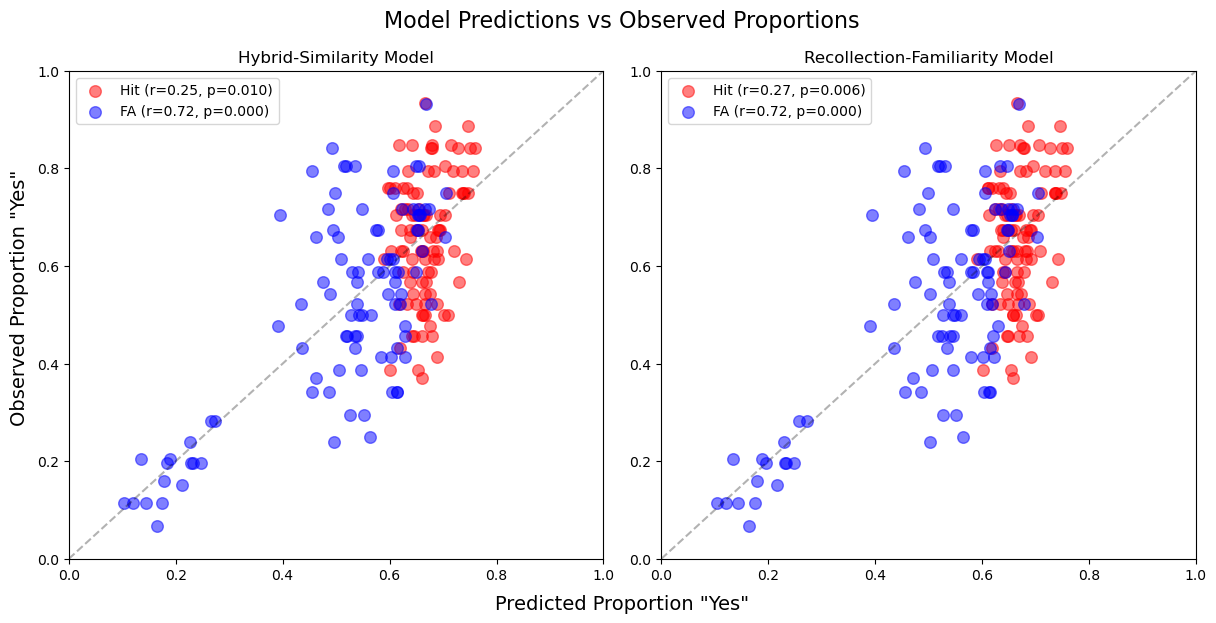

In [277]:
# Models Predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
axes = axes.ravel()  # flatten to 1D array
models = ['HS_preds', 'Recollect_preds'] # repeat each model twice
model_labels = ['Hybrid-Similarity Model', 'Recollection-Familiarity Model']

for i, ax, (model, mod_label) in zip(
    range(len(models)),
    axes, 
    zip(models, model_labels)
    ):
    
    # Correlation between predictions and observed proportions
    cors = df_by_item.groupby('resp_type', observed=True, group_keys=False).apply(
        lambda x: pd.Series(
            stats.pearsonr(x['prop_yes'], x[model]),
            index=['r', 'p_value']
        ),
        include_groups=False
        ).reset_index()
    
    # Hit
    x = df_by_item.loc[df_by_item['resp_type']=='Hit', model] # predictions
    y = df_by_item.loc[df_by_item['resp_type']=='Hit', 'prop_yes'] # observed proportions

    r = cors.loc[cors['resp_type']=='Hit', 'r'].values[0] # correlation value
    p_value = cors.loc[cors['resp_type']=='Hit', 'p_value'].values[0] # p-value
    
    # Scatter plot
    ax.scatter(x, y, alpha=0.5, s = 70, color='red', label=f'Hit (r={r:.2f}, p={p_value:.3f})')
    
    # FA
    x = df_by_item.loc[df_by_item['resp_type']=='FA', model] # predictions
    y = df_by_item.loc[df_by_item['resp_type']=='FA', 'prop_yes'] # observed proportions

    r = cors.loc[cors['resp_type']=='FA', 'r'].values[0] # correlation value
    p_value = cors.loc[cors['resp_type']=='FA', 'p_value'].values[0] # p-value
    
    # Scatter plot
    ax.scatter(x, y, alpha=0.5, s = 70, color='blue', label=f'FA (r={r:.2f}, p={p_value:.3f})')
    
    # Y=X line
    ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f'{mod_label}')
    ax.legend()

# set super labels
plt.suptitle('Model Predictions vs Observed Proportions', fontsize=16)
fig.text(0.5, -0.01, 'Predicted Proportion "Yes"', 
         ha='center', va='center', fontsize=14)
fig.text(-0.01, 0.5, 'Observed Proportion "Yes"',va='center', rotation='vertical',fontsize=14)
plt.tight_layout()
plt.show()
    

# Save data

In [270]:
# Save only the variables you actually need
variables_to_save = {
    # all IDs
    'credited_IDs': credited_IDs,
    # Split-half lists
    'sh_corrs_hits': sh_corrs_hits,
    'sh_corrs_hits_random': sh_corrs_hits_random,
    'sh_corrs_fa': sh_corrs_fa,
    'sh_corrs_fa_random': sh_corrs_fa_random,
    
    # Aggregated by item
    'df_by_item': df_by_item,
    'df_by_item_wide': df_by_item_wide,
    
    # Distance matrices
    'dist_mat_gr1': dist_mat_gr1,
    'dist_mat_gr2': dist_mat_gr2,
    
    # Distinctiveness dictionary
    'distinctiveness_image_id': distinctiveness_image_id,
    
    # Optimizers for 
    # H-S model
    'individ_hs_optim_gr1': individ_hs_optim_gr1,
    'individ_hs_optim_gr2': individ_hs_optim_gr2,
    # Recollection model
    'recollect_optim_gr1': recollect_optim_gr1,
    'recollect_optim_gr2': recollect_optim_gr2,
    
    # All data (test and memory phases)
    'filtered_data_test': filtered_data_test,
    'filtered_data_memory': filtered_data_memory,

    # Add other variables you want to keep
}

with open("Exp2_analysis.pkl", "wb") as f:
    dill.dump(variables_to_save, f)